# Imports

In [101]:
import re
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
import statistics
from statsmodels.graphics import tsaplots

# Get the PDE Data

In [54]:
pde_dict = {}

# Define variables and coefficients using regular expression
pattern = re.compile(r'([-+]?\s*\d*\.\d+\s*)?(\w+)(?:_(\d+))?')

with open(r"PDE.txt", 'r') as f:
    lines = f.readlines()
    # Equation for which of the trajectories?
    for line in lines:
        if line.__contains__("20:"):
            key = '20'
        elif line.__contains__("22:"):
            key = '22'
        elif line.__contains__("24:"):
            key = '24'
        else:
            # Read equation
            if line.strip():
                matches = pattern.findall(line)
                # Write dictionary for each variable
                equation_dict = {}
                for coefficient, variable, exponent in matches:
                    coefficient = float(coefficient.replace(" ", "")) if coefficient else 1.0
                    exponent = int(exponent) if exponent else 1
                    equation_dict[variable + ('_' + exponent if exponent > 1 else '')] = [coefficient]
                if key not in pde_dict:
                    pde_dict[key] = equation_dict
                else:
                    dict1 = pde_dict[key]
                    for key_dict2, value_dict2 in equation_dict.items():
                        if key_dict2 in dict1:
                            dict1[key_dict2].extend(value_dict2)
                        else:
                            dict1[key_dict2] = value_dict2
                    pde_dict[key].update(dict1)

# Analyze Variable Value Distribution

Standard deviation of Trajectory20, u: 7.168297840906893
Mean of Trajectory 20, u: 4.290863636363636


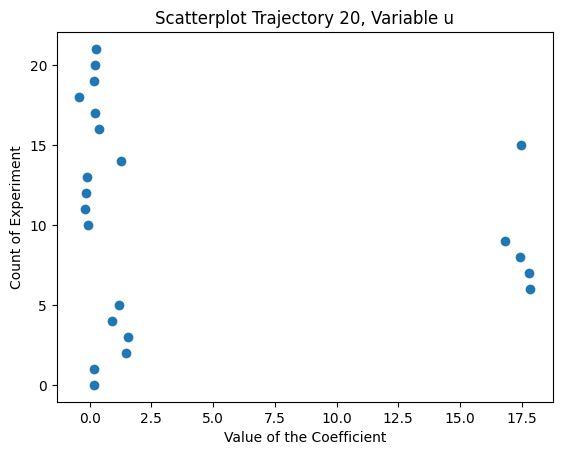

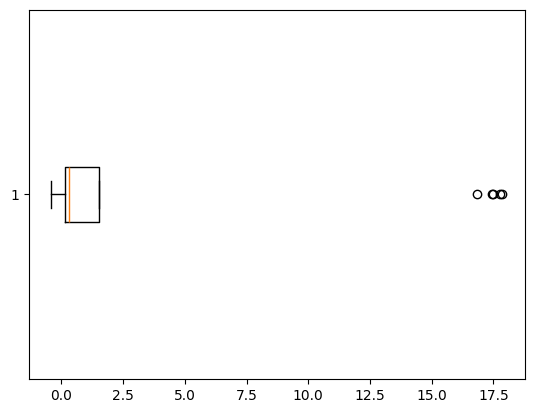

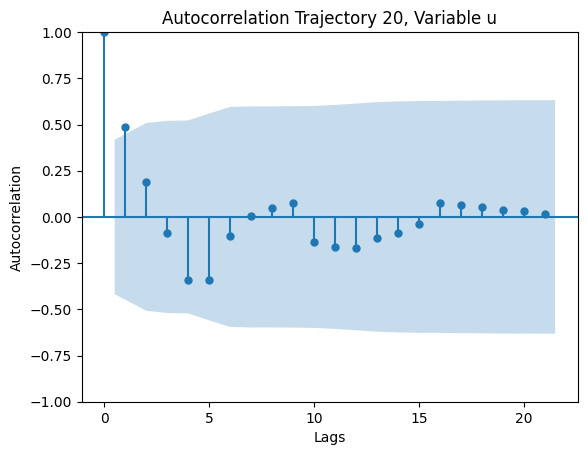

Standard deviation of Trajectory20, uu: 0.43089683526875444
Mean of Trajectory 20, uu: -0.0580909090909091


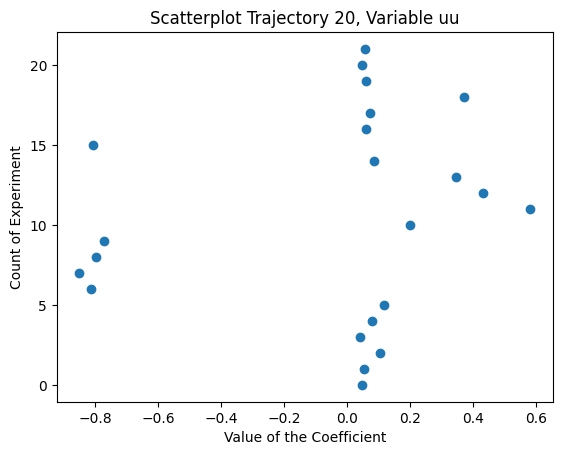

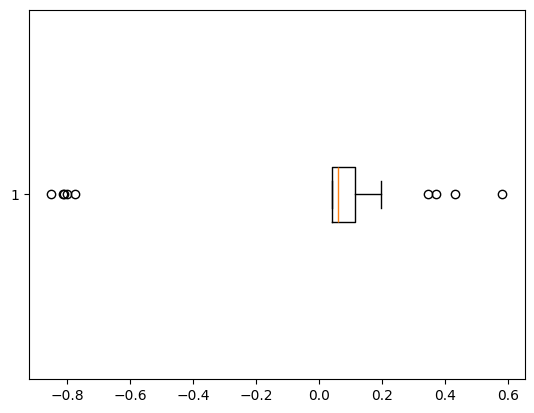

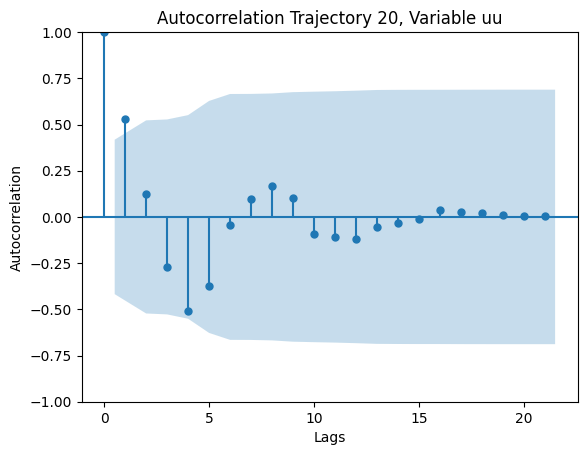

Standard deviation of Trajectory20, uuu: 0.16198636598936317
Mean of Trajectory 20, uuu: -0.0011904761904761901


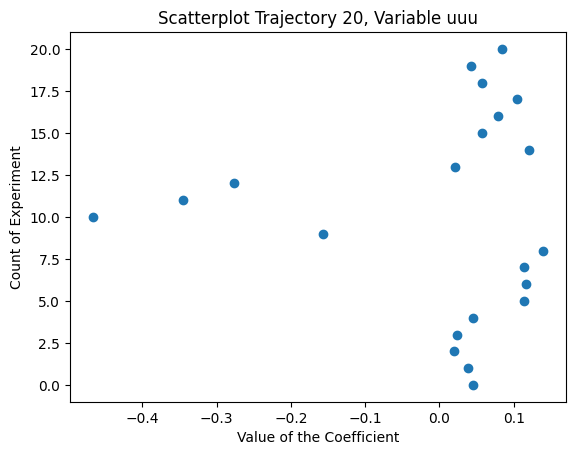

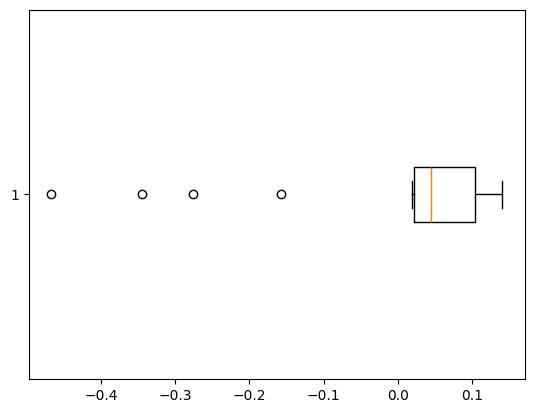

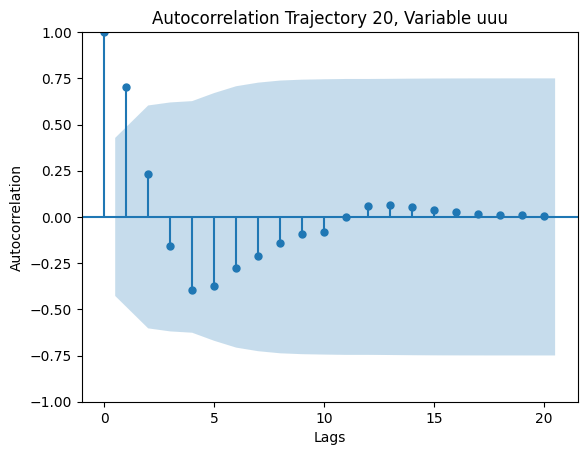

Standard deviation of Trajectory20, u_2: 0.07168313764214163
Mean of Trajectory 20, u_2: 0.00016666666666666422


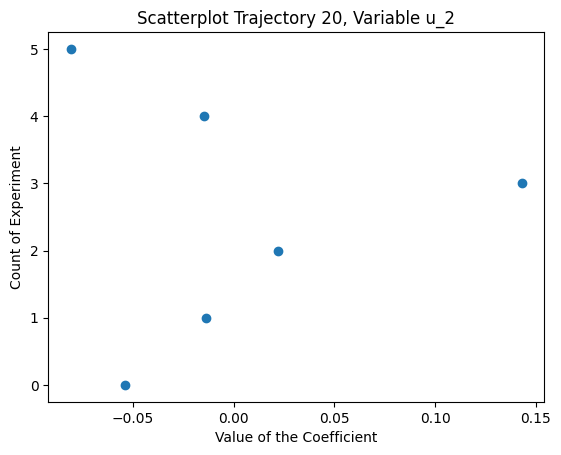

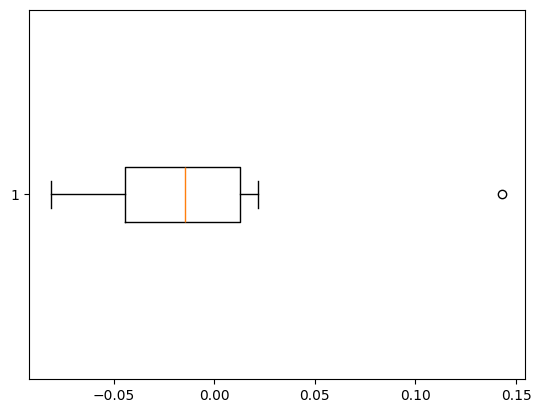

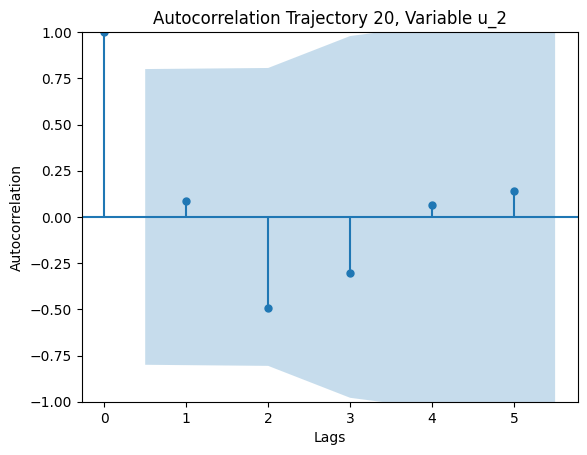

Standard deviation of Trajectory20, u_22: 0.046702962075939755
Mean of Trajectory 20, u_22: 0.027


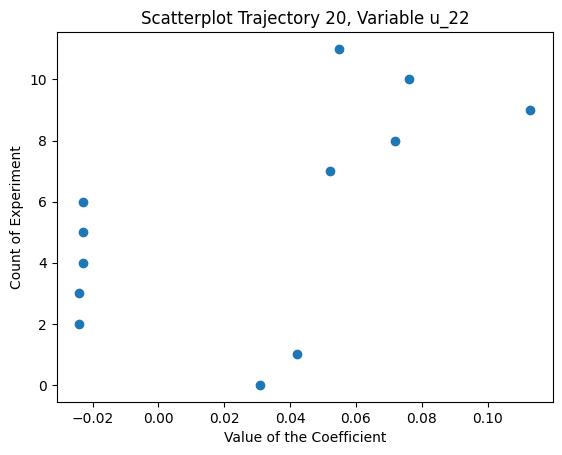

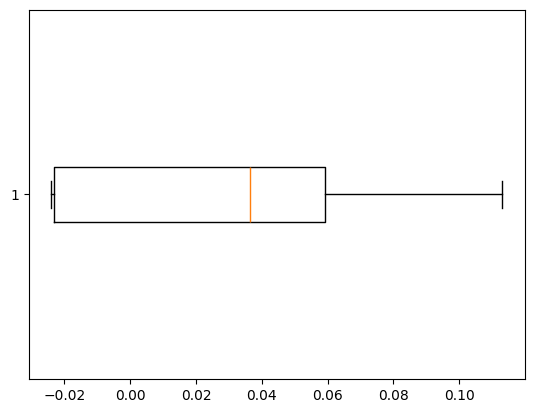

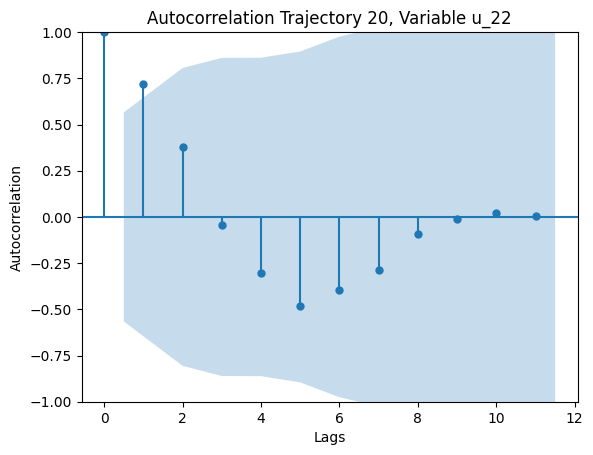

Standard deviation of Trajectory20, u_222: 0.014735633304642488
Mean of Trajectory 20, u_222: 0.010166666666666668


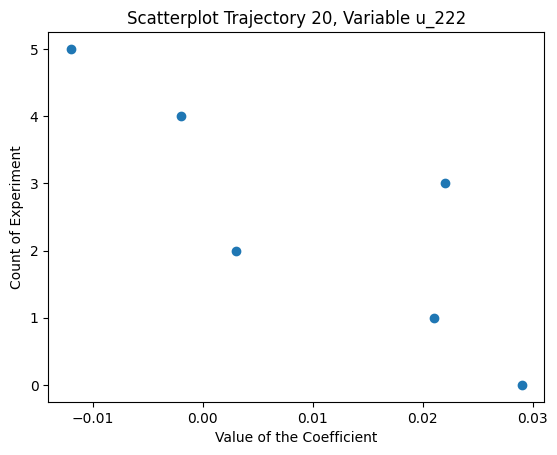

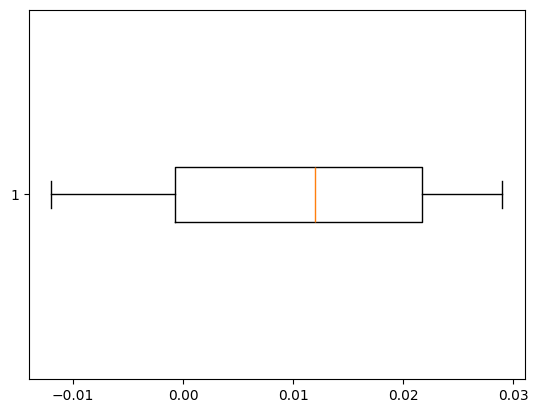

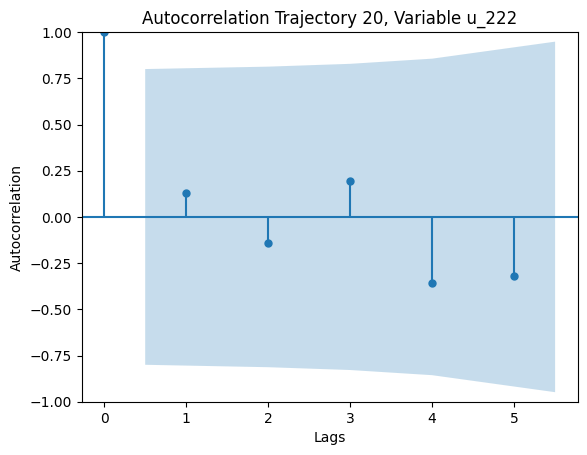

Standard deviation of Trajectory20, u_2222: 0.02685638296797335
Mean of Trajectory 20, u_2222: 0.08014285714285714


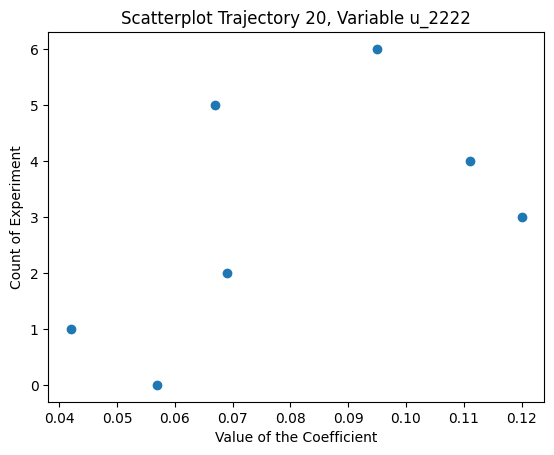

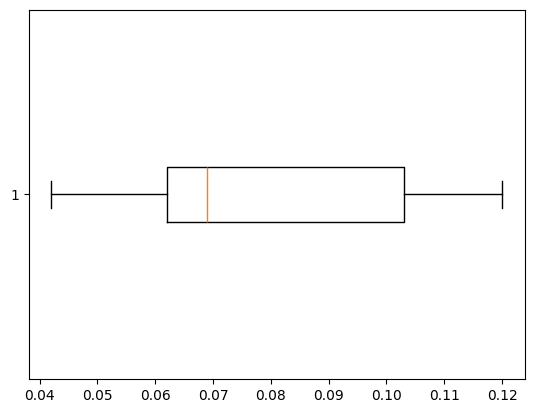

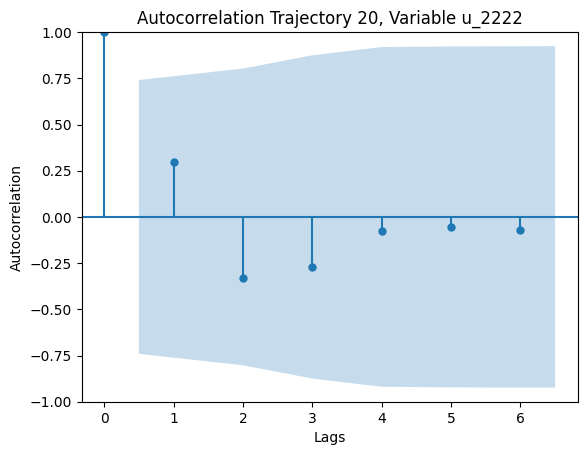

Standard deviation of Trajectory20, u_1: 0.0818387642461281
Mean of Trajectory 20, u_1: -0.0005000000000000022


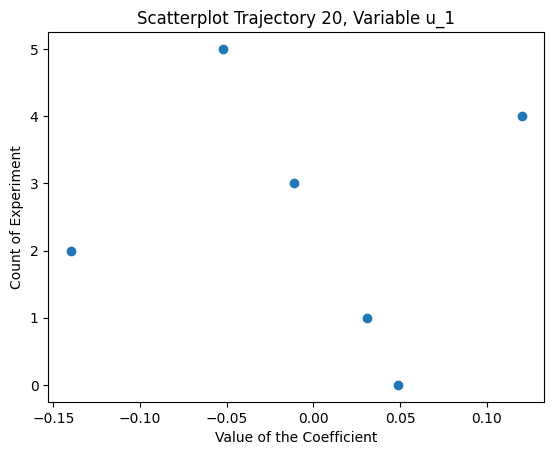

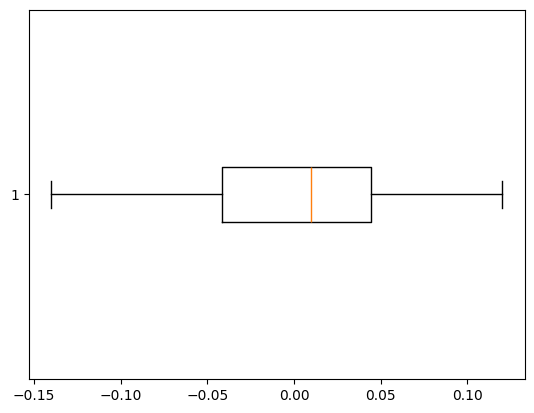

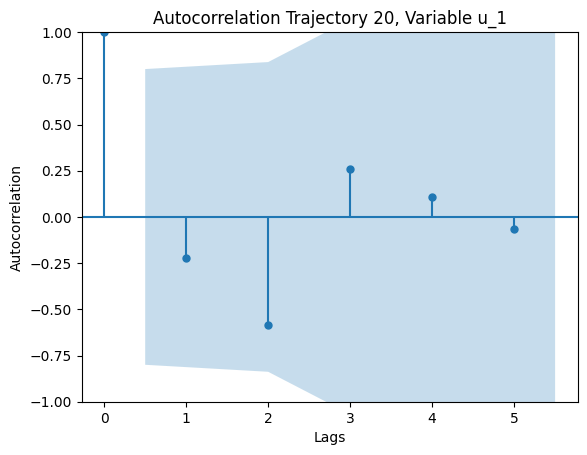

Standard deviation of Trajectory20, u_12: 0.03592005011132362
Mean of Trajectory 20, u_12: -0.0055000000000000005


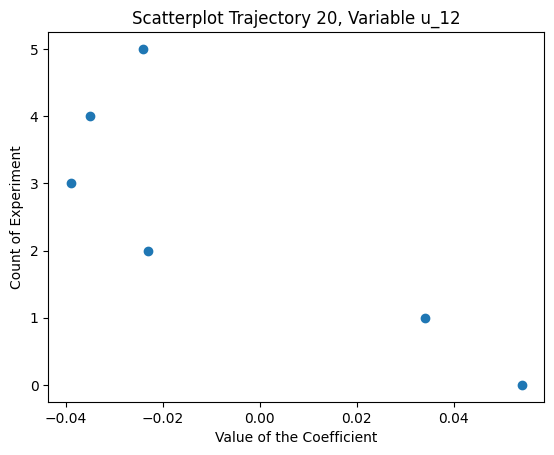

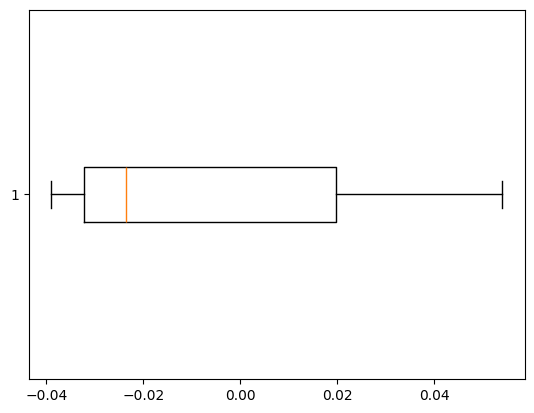

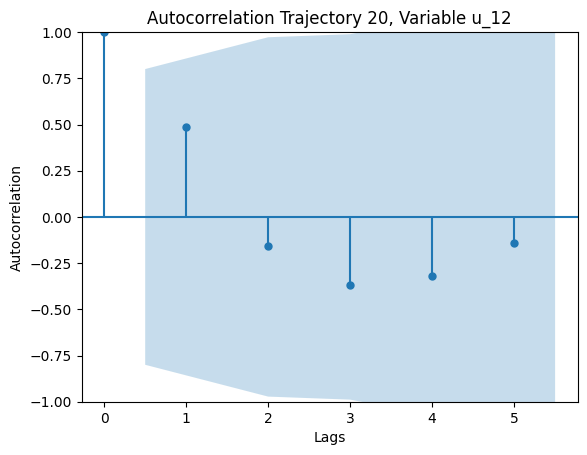

Standard deviation of Trajectory20, u_122: 0.018732028424302823
Mean of Trajectory 20, u_122: 0.011333333333333334


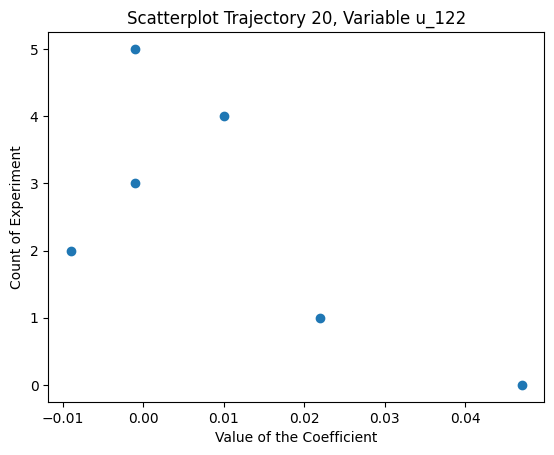

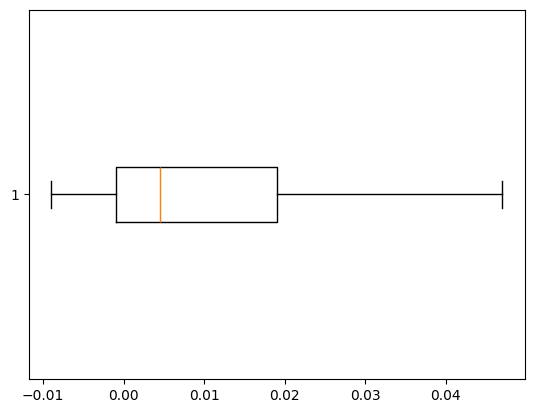

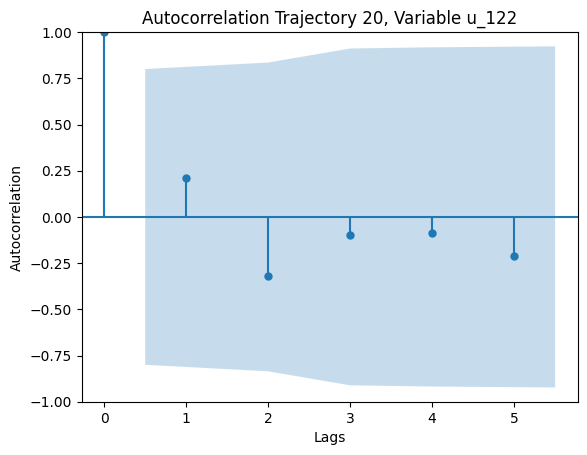

Standard deviation of Trajectory20, u_1222: 0.03168946547706701
Mean of Trajectory 20, u_1222: 0.019666666666666666


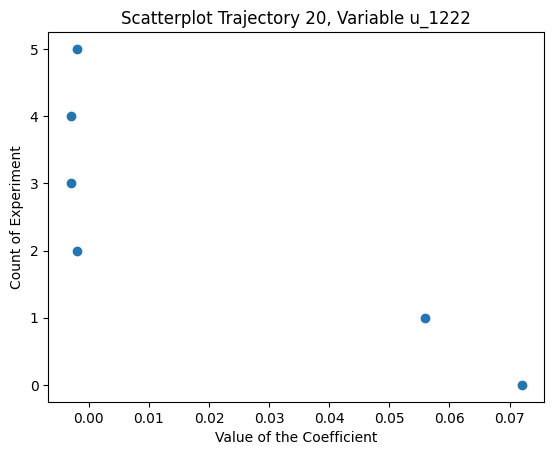

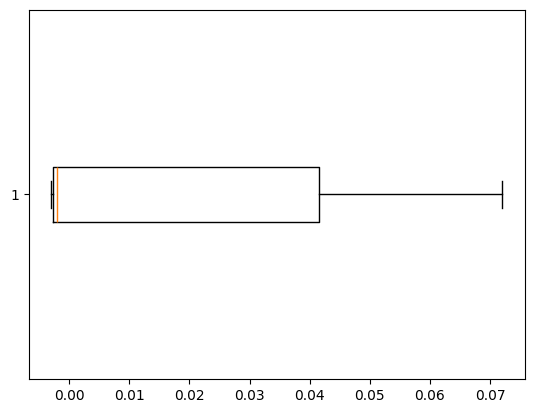

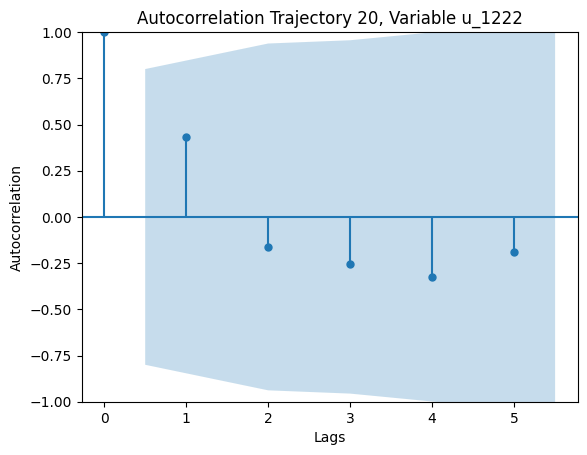

Standard deviation of Trajectory20, u_11: 0.04123972409885886
Mean of Trajectory 20, u_11: 0.0333125


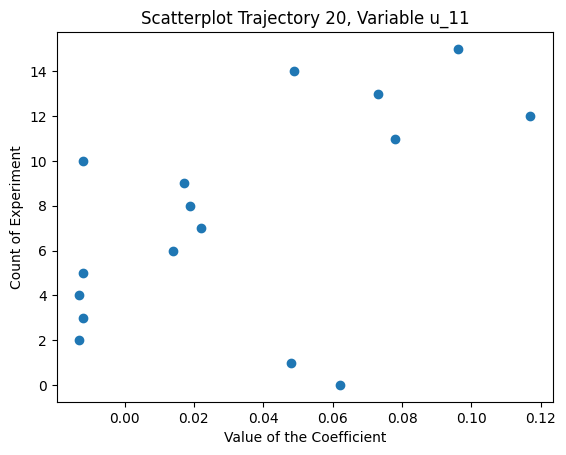

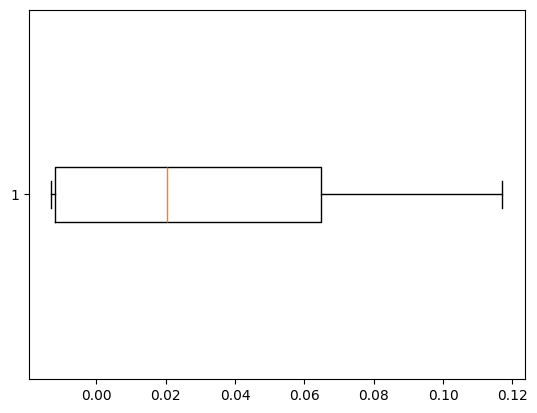

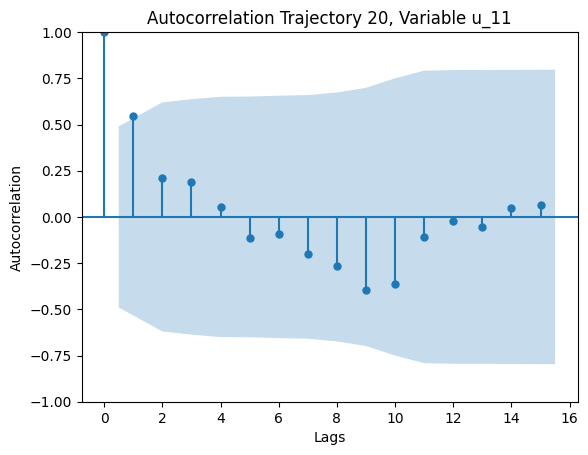

Standard deviation of Trajectory20, u_112: 0.02450453472772381
Mean of Trajectory 20, u_112: 0.018166666666666668


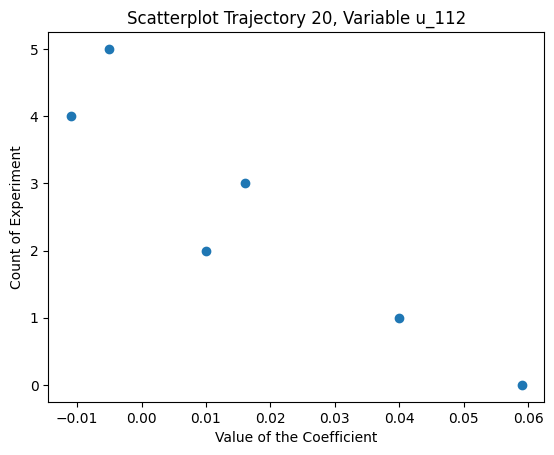

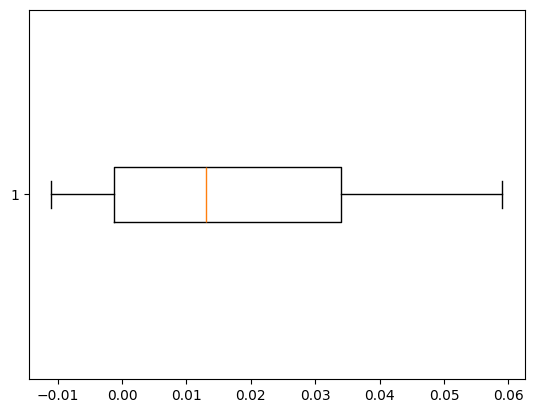

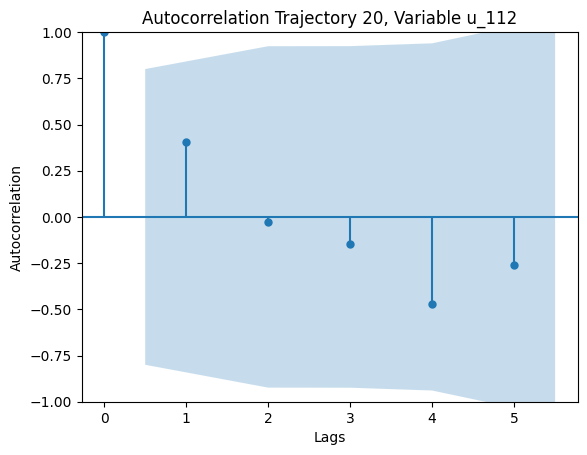

Standard deviation of Trajectory20, u_1122: 0.02610262321636487
Mean of Trajectory 20, u_1122: 0.06328571428571428


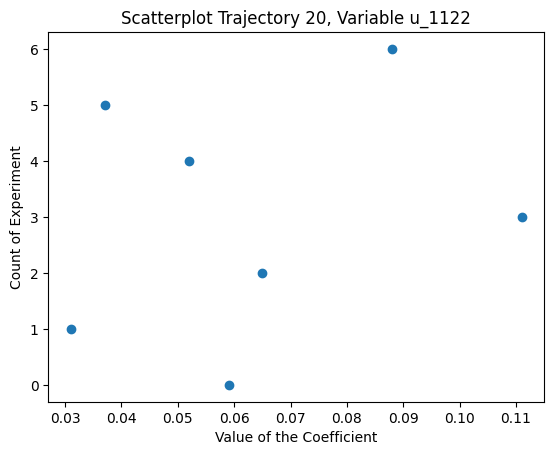

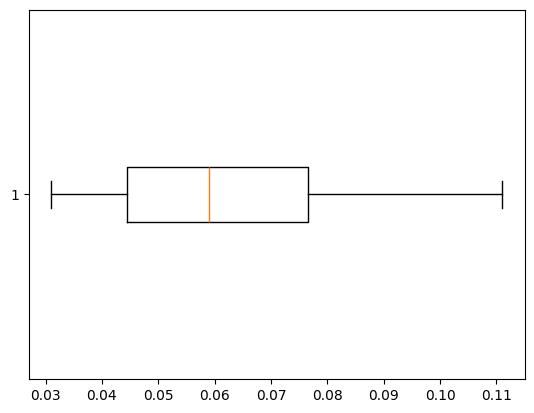

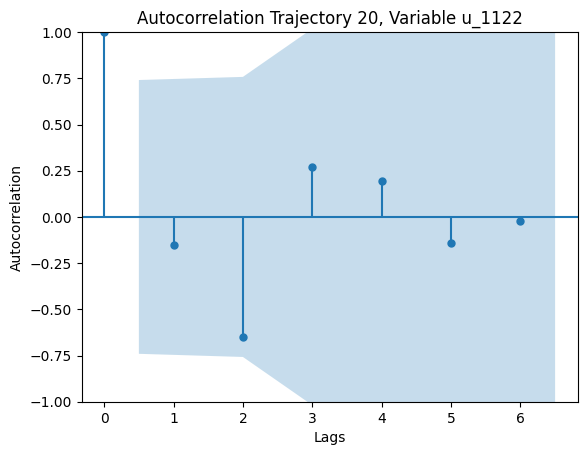

Standard deviation of Trajectory20, u_111: 0.03444520608476921
Mean of Trajectory 20, u_111: 0.018833333333333334


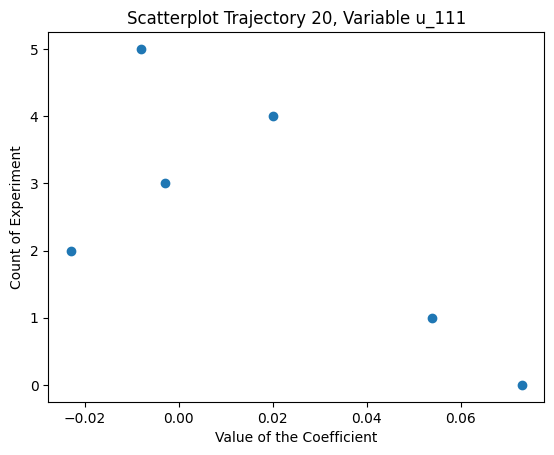

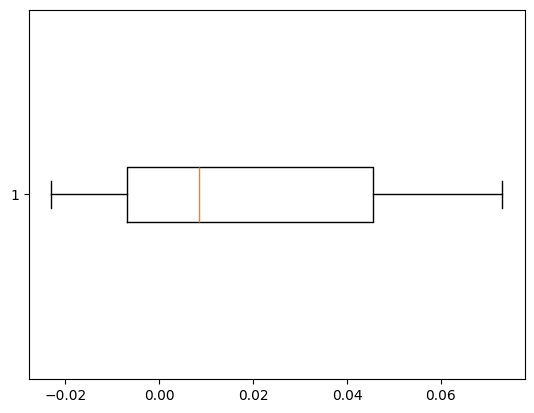

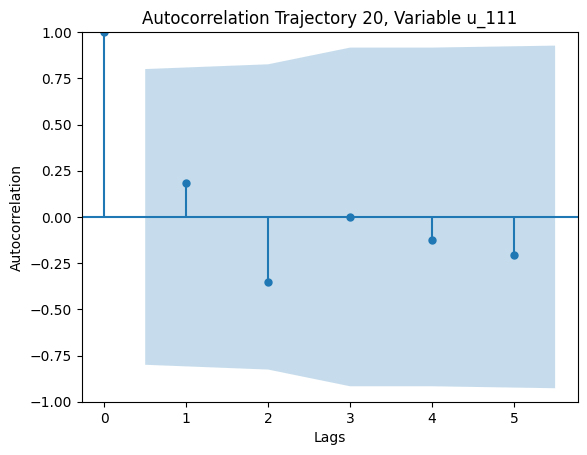

Standard deviation of Trajectory20, u_1112: 0.02997220935021864
Mean of Trajectory 20, u_1112: 0.018000000000000002


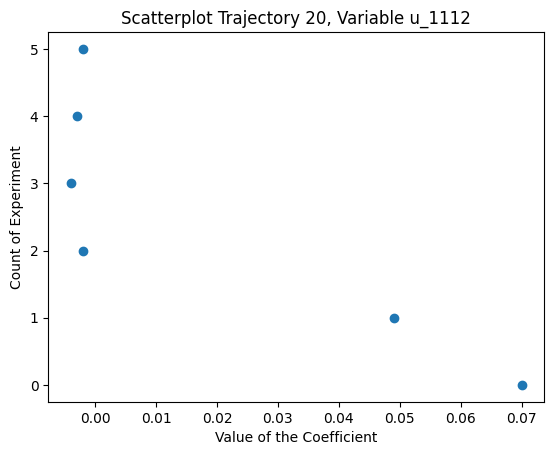

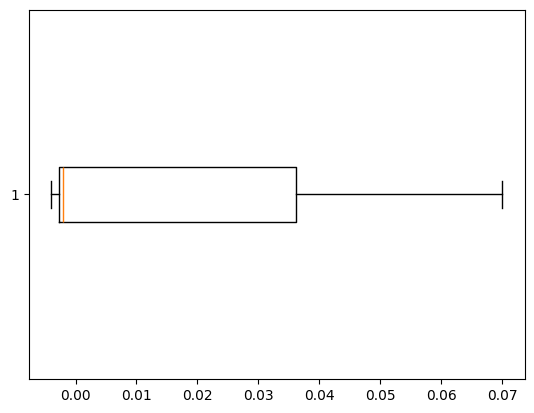

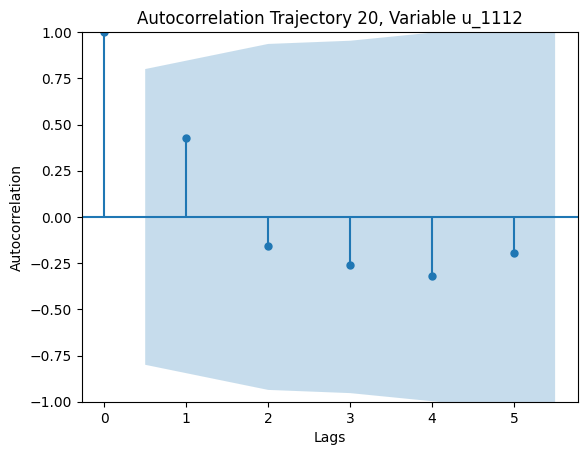

Standard deviation of Trajectory20, u_1111: 0.04064053263137656
Mean of Trajectory 20, u_1111: 0.051727272727272726


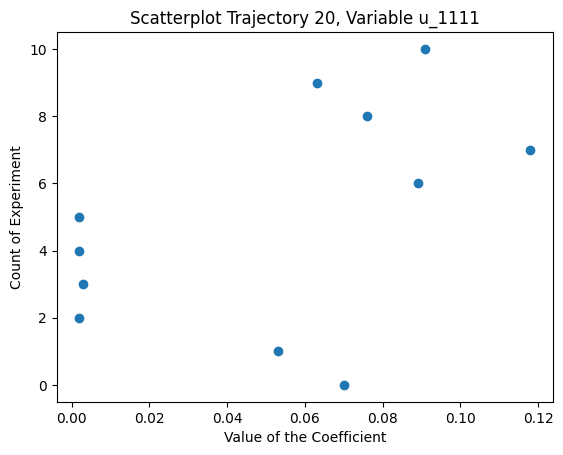

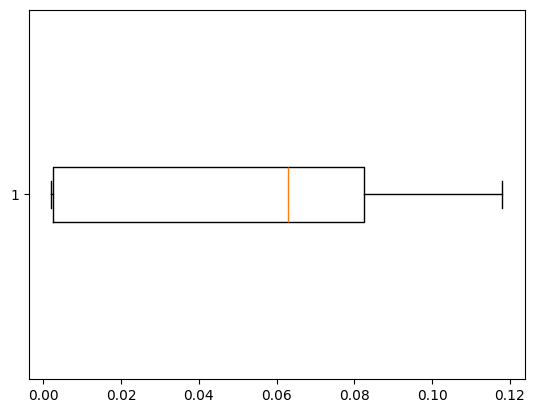

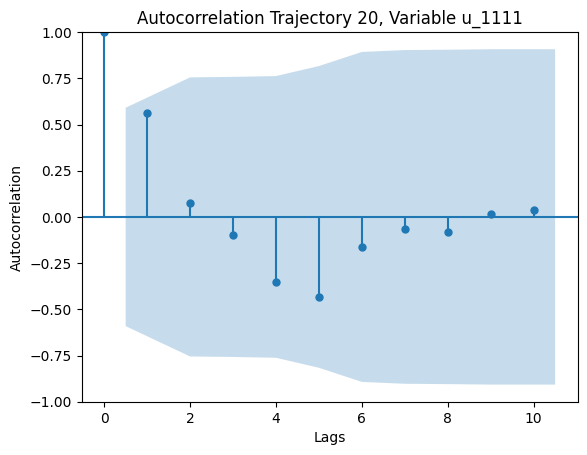

Standard deviation of Trajectory22, u: 0.26723811232248657
Mean of Trajectory 22, u: 0.27586363636363637


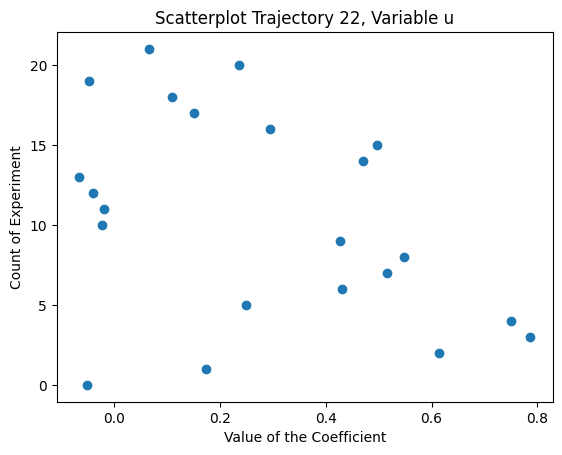

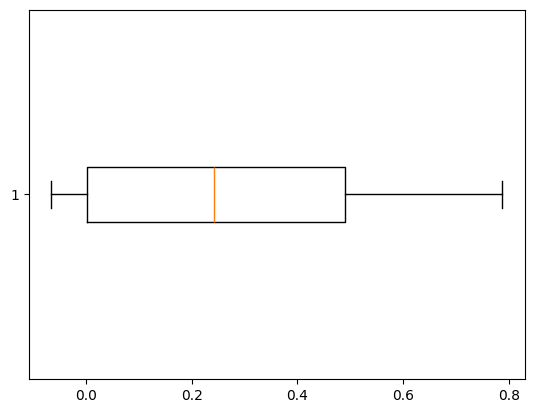

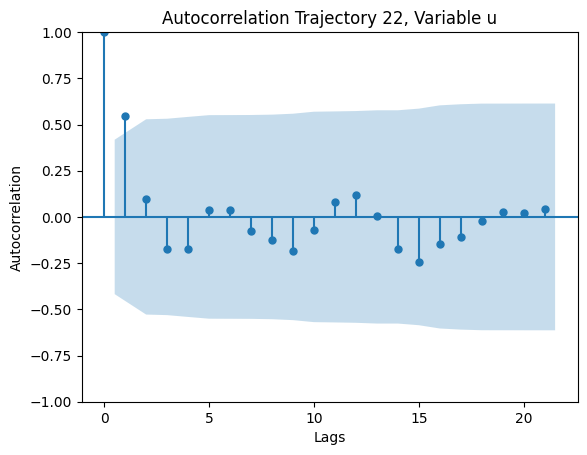

Standard deviation of Trajectory22, uu: 0.07347632721602941
Mean of Trajectory 22, uu: 0.16295454545454546


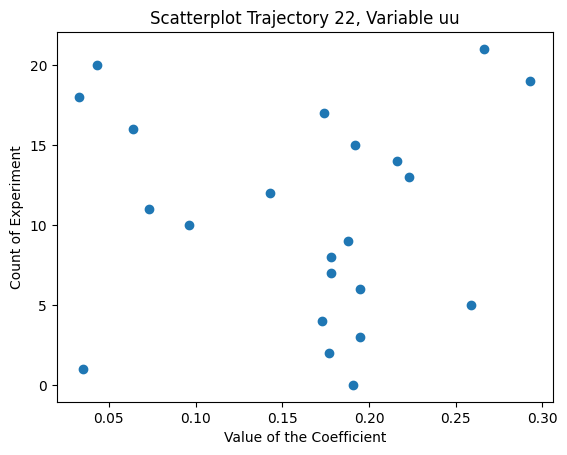

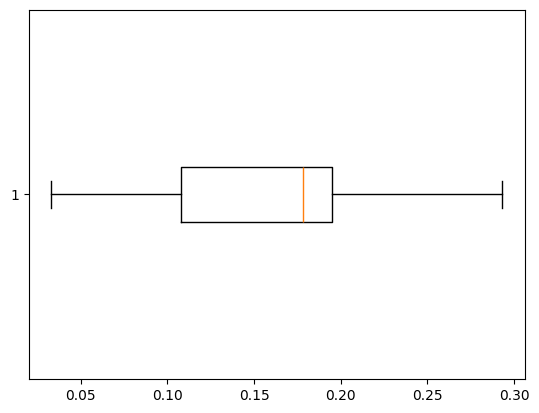

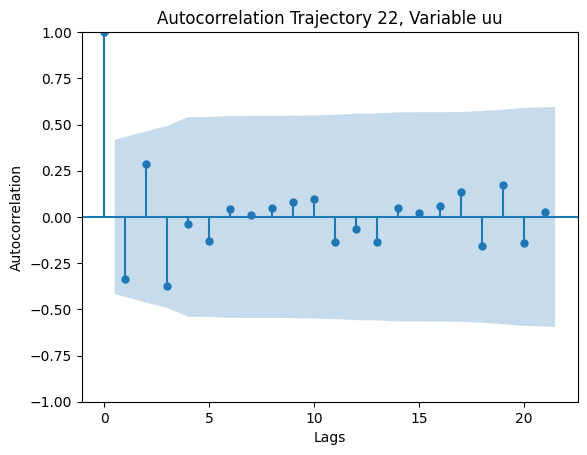

Standard deviation of Trajectory22, uuu: 0.09459979443564577
Mean of Trajectory 22, uuu: 0.01576470588235294


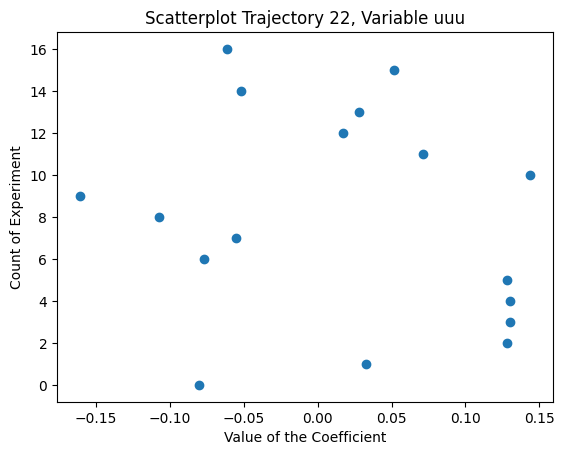

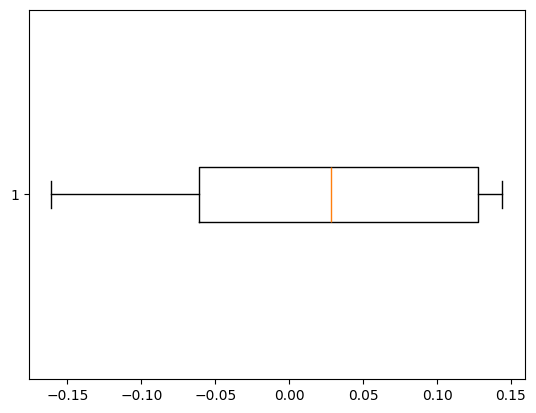

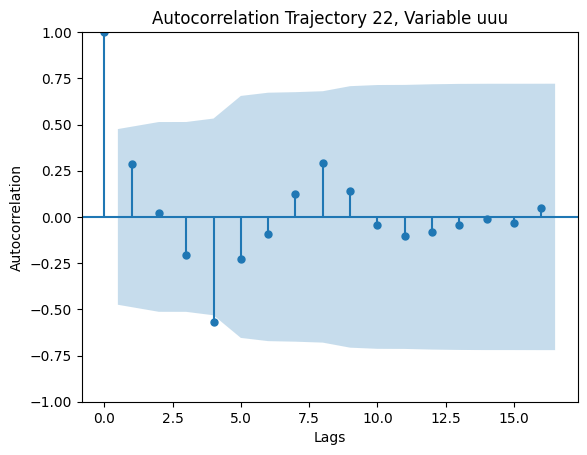

Standard deviation of Trajectory22, u_2: 0.012243762584361974
Mean of Trajectory 22, u_2: 0.03158333333333333


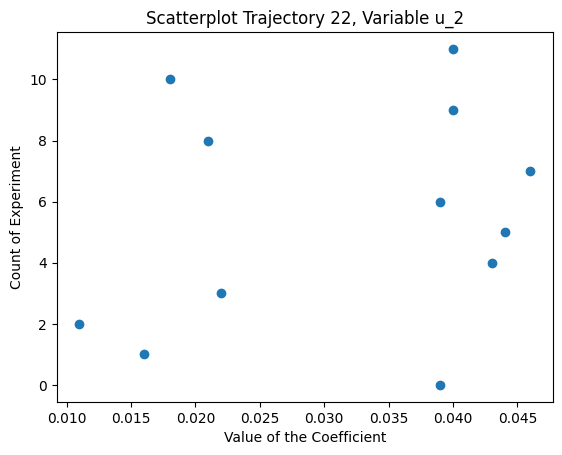

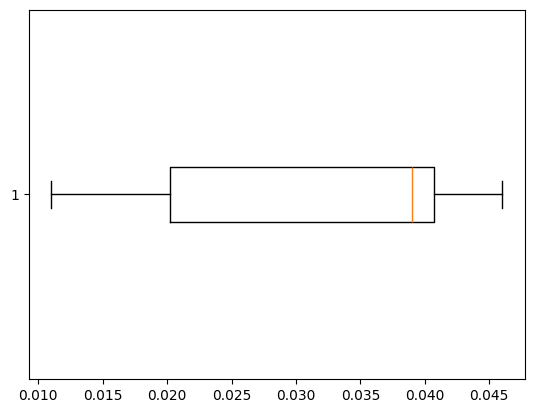

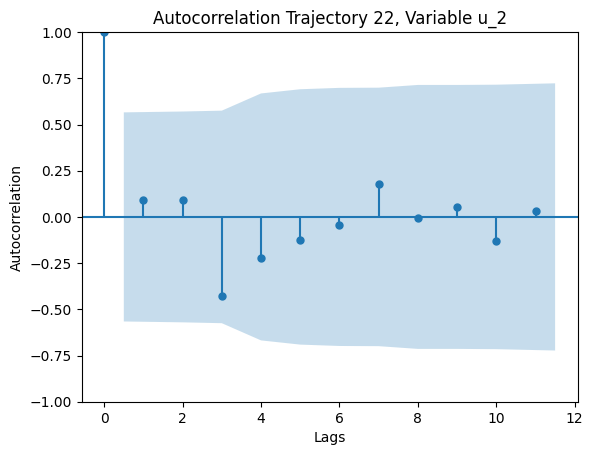

Standard deviation of Trajectory22, u_22: 0.030414264745346056
Mean of Trajectory 22, u_22: 0.05835


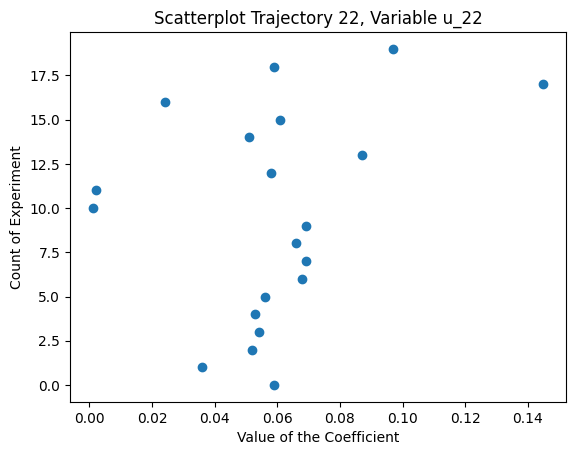

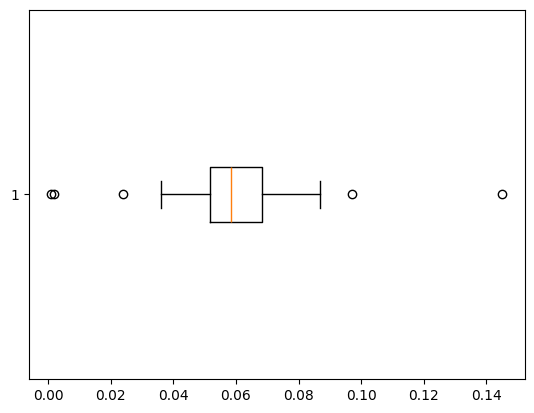

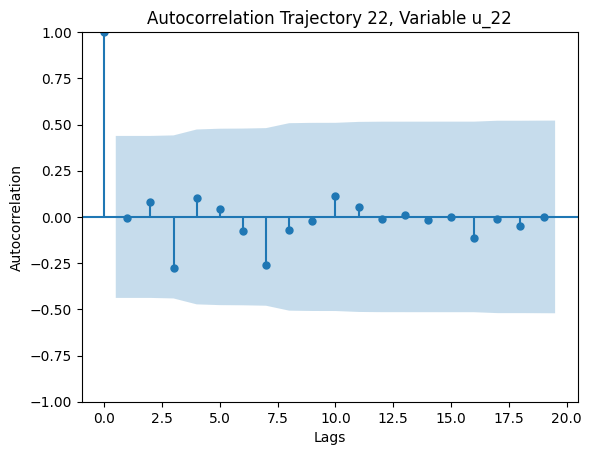

Standard deviation of Trajectory22, u_222: 0.02428753378835861
Mean of Trajectory 22, u_222: 0.030545454545454546


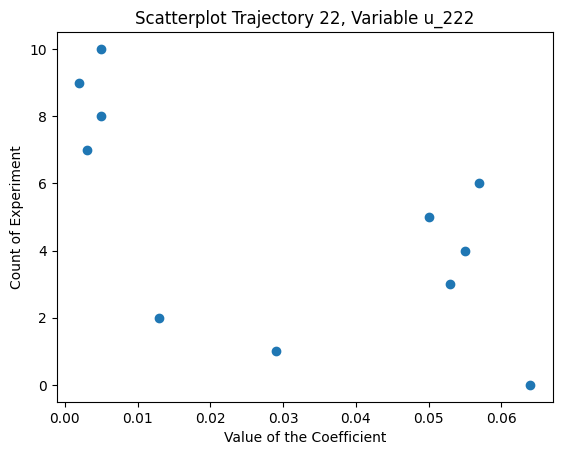

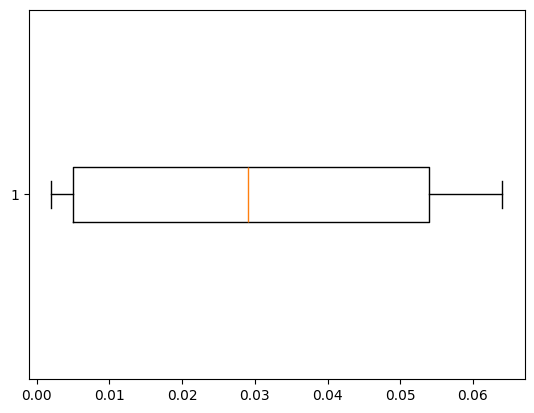

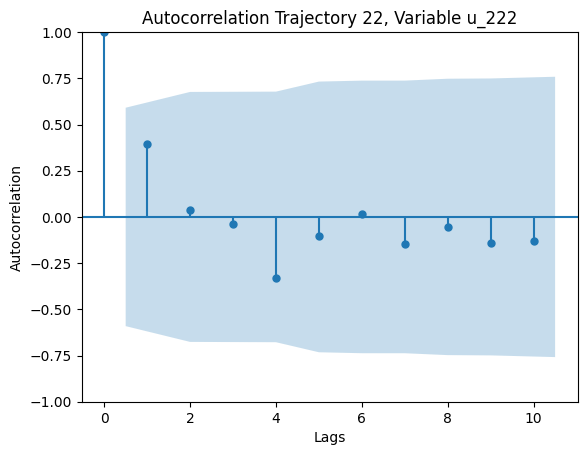

Standard deviation of Trajectory22, u_2222: 0.03560972436197453
Mean of Trajectory 22, u_2222: 0.06694444444444445


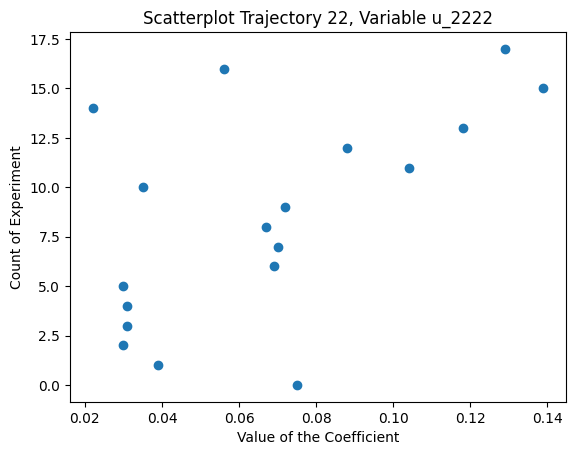

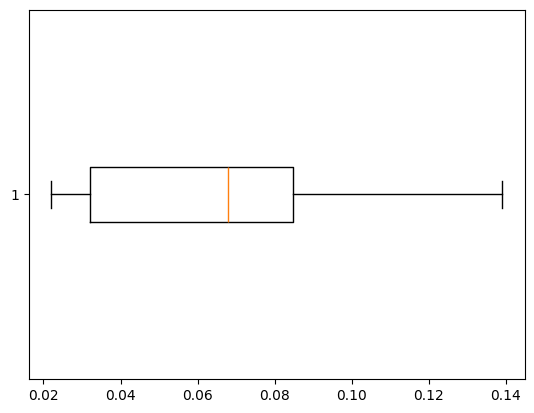

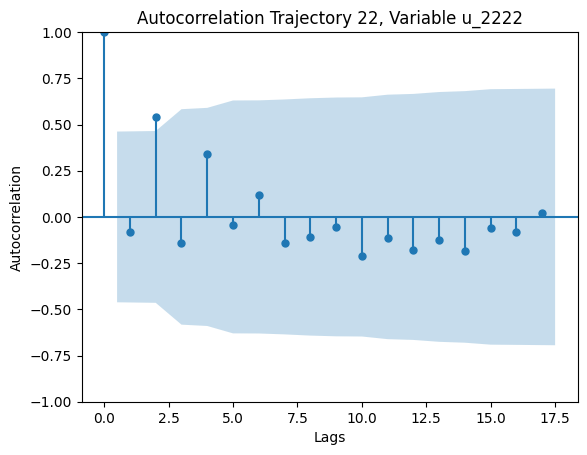

Standard deviation of Trajectory22, u_1: 0.04540308359572068
Mean of Trajectory 22, u_1: 0.0254


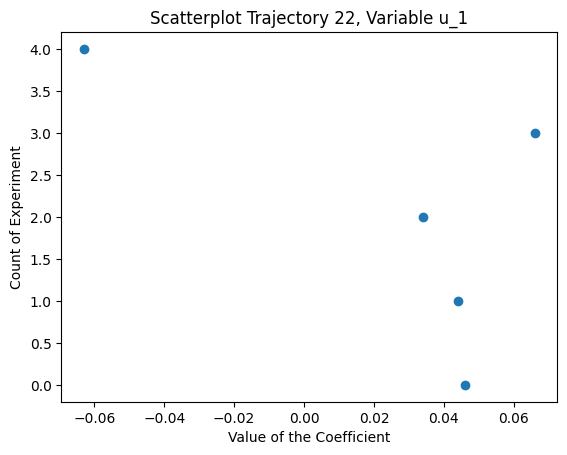

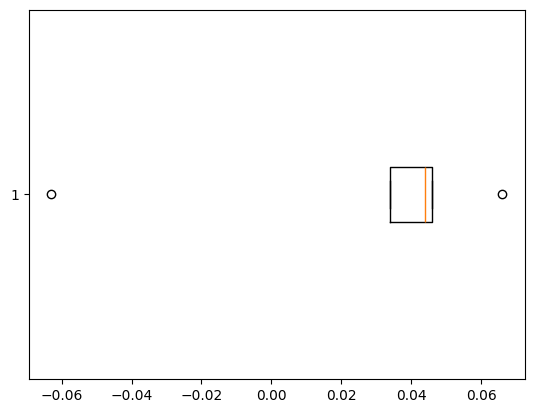

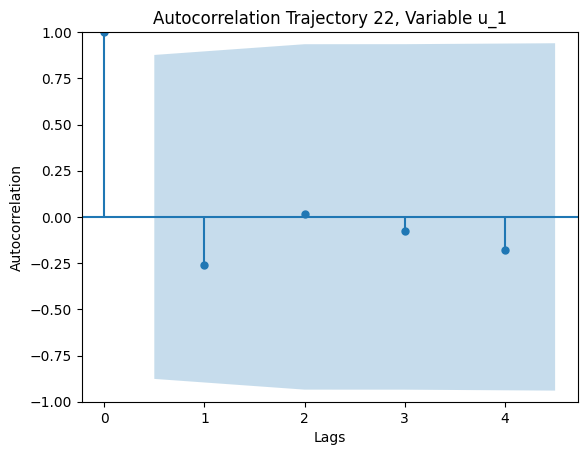

Standard deviation of Trajectory22, u_12: 0.011
Mean of Trajectory 22, u_12: 0.044


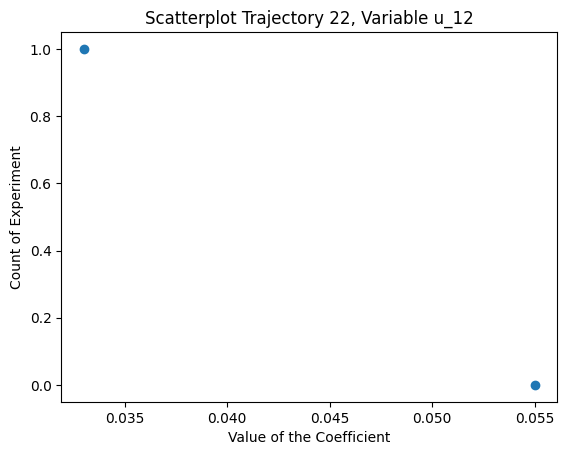

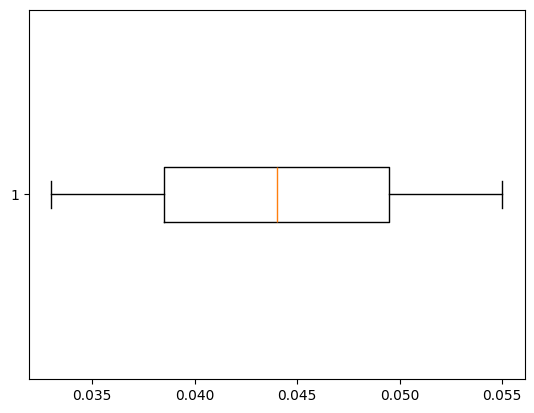

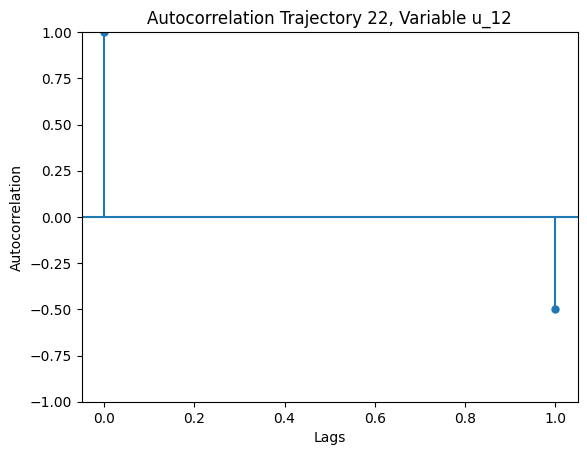

Standard deviation of Trajectory22, u_122: 0.0189208879284245
Mean of Trajectory 22, u_122: 0.015


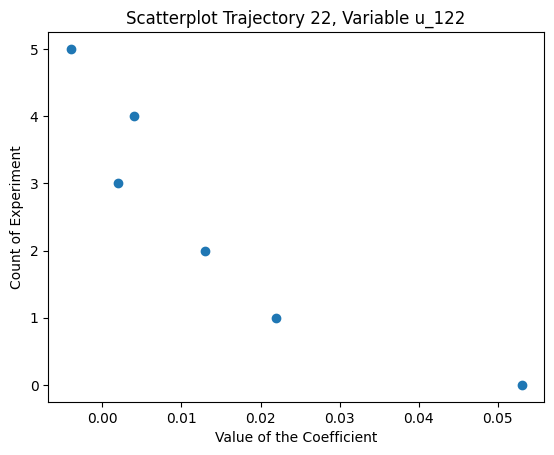

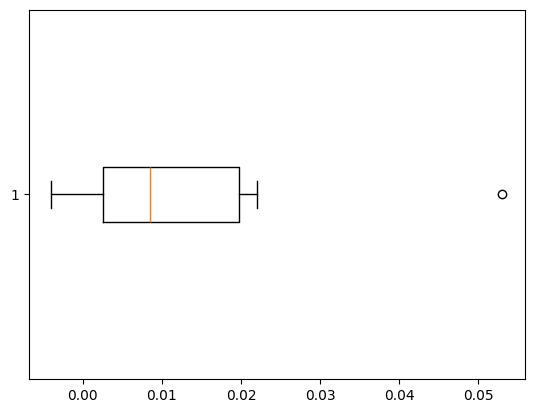

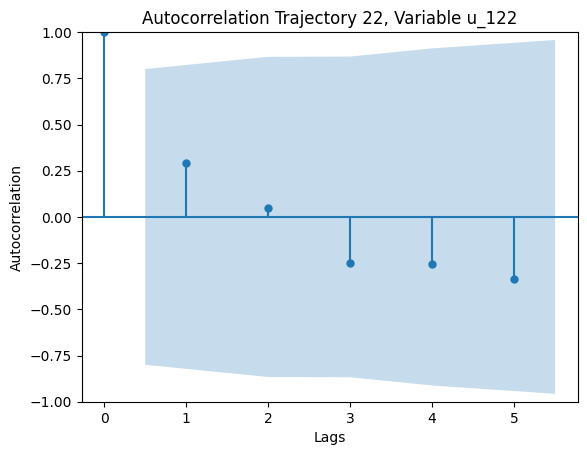

Standard deviation of Trajectory22, u_1222: 0.022022715545545243
Mean of Trajectory 22, u_1222: 0.031


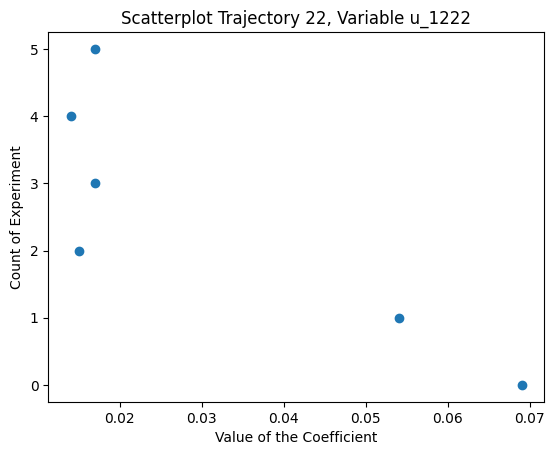

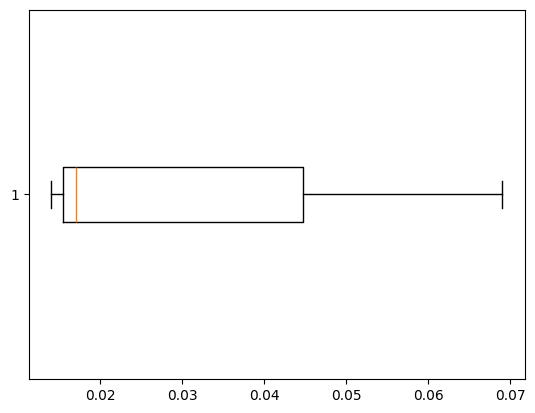

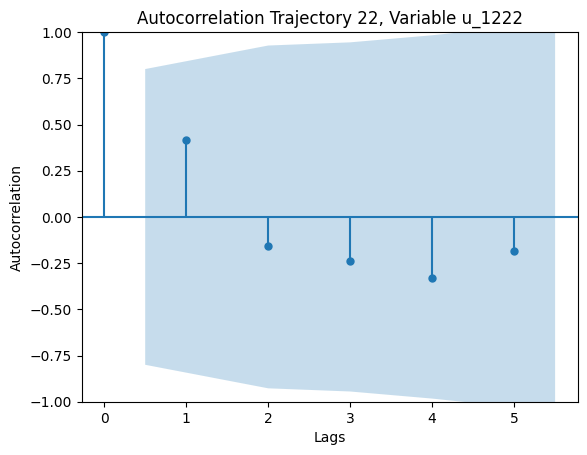

Standard deviation of Trajectory22, u_11: 0.04005773610954846
Mean of Trajectory 22, u_11: 0.06766666666666667


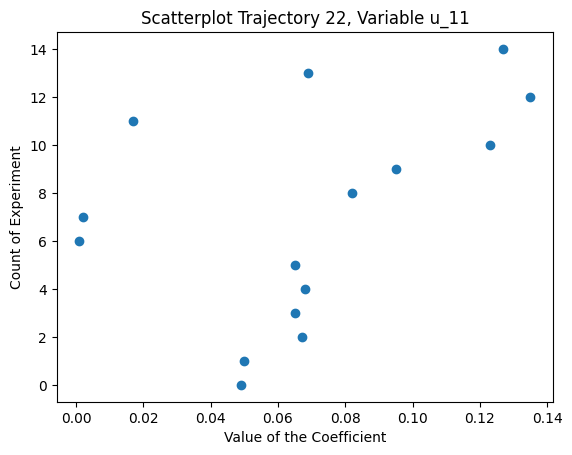

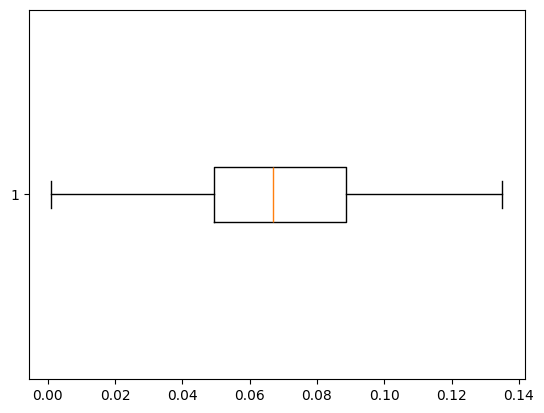

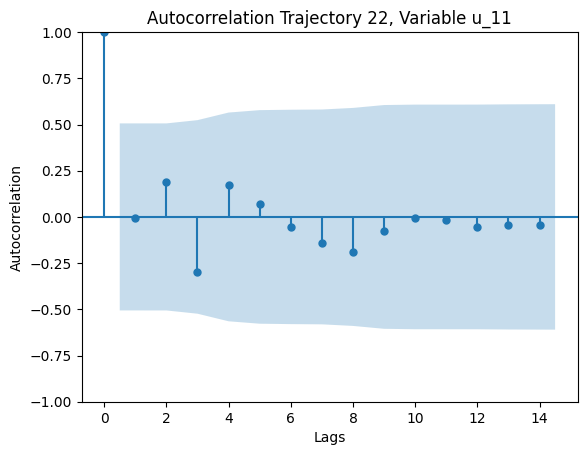

Standard deviation of Trajectory22, u_112: 0.0189971050426111
Mean of Trajectory 22, u_112: 0.0199


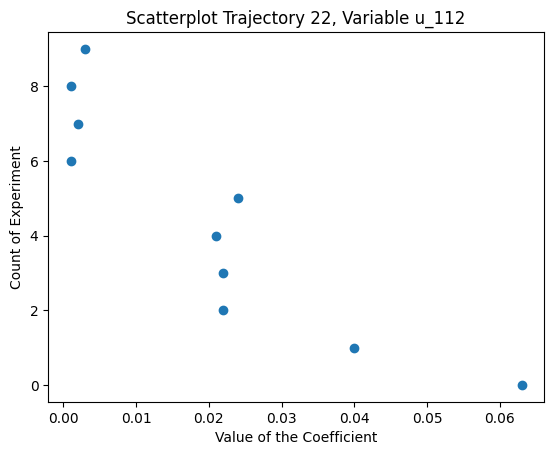

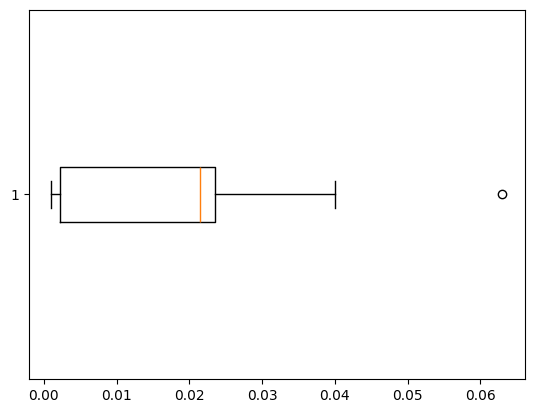

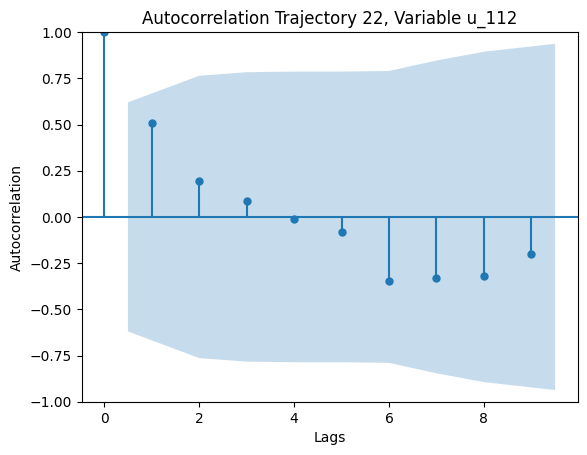

Standard deviation of Trajectory22, u_1122: 0.036148781099782604
Mean of Trajectory 22, u_1122: 0.077375


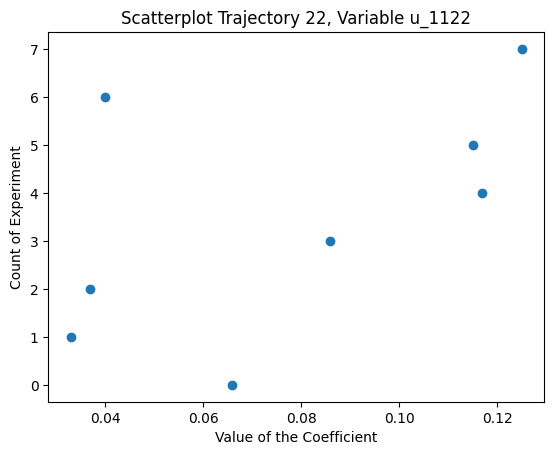

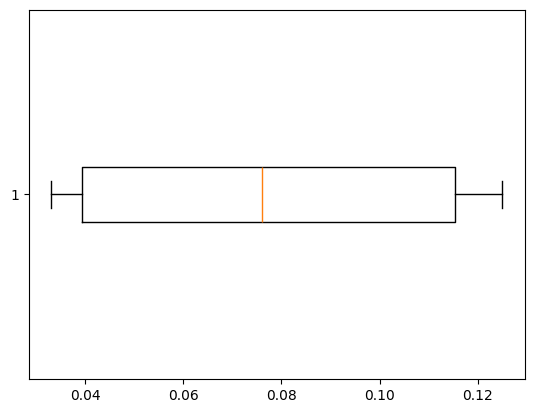

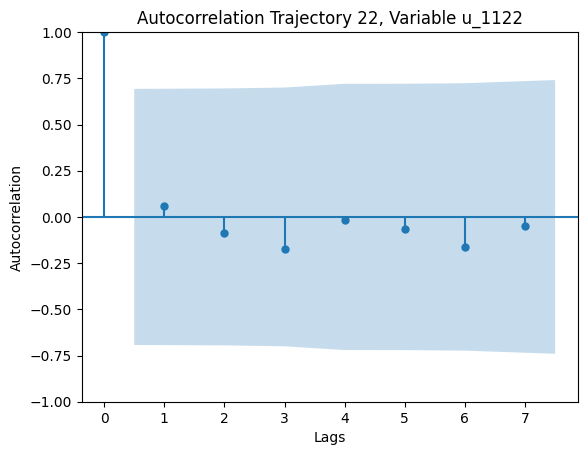

Standard deviation of Trajectory22, u_111: 0.02217160902852069
Mean of Trajectory 22, u_111: 0.020555555555555556


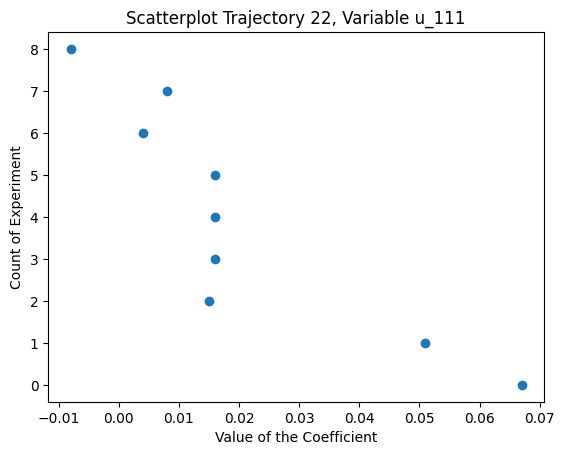

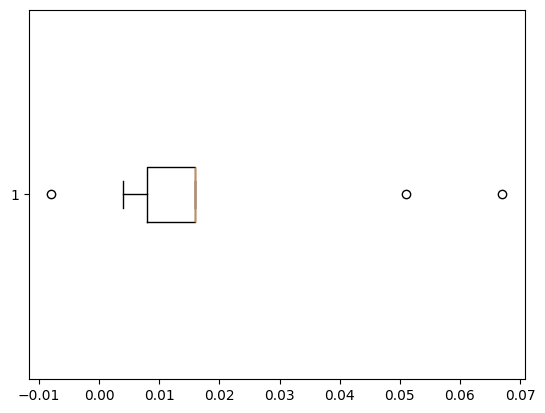

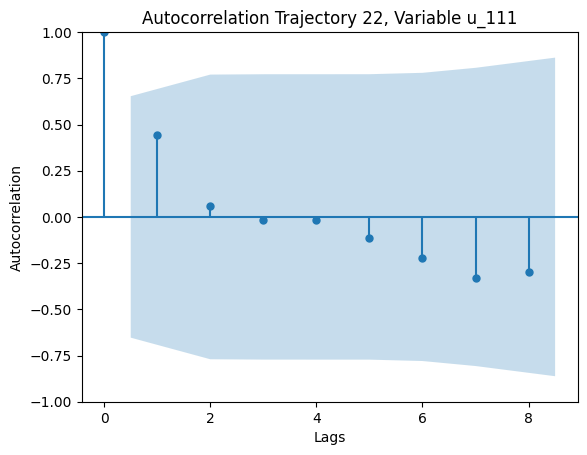

Standard deviation of Trajectory22, u_1112: 0.021491600426419826
Mean of Trajectory 22, u_1112: 0.030333333333333334


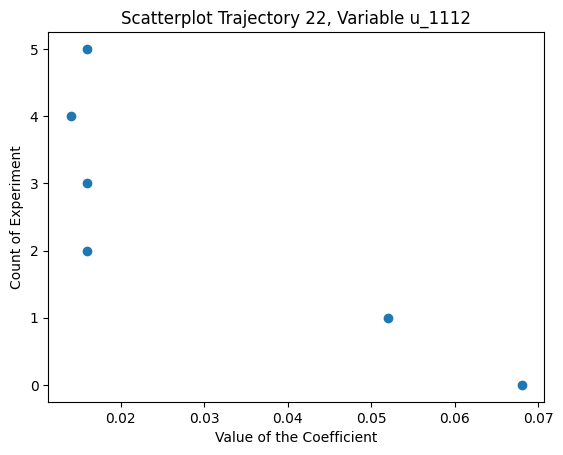

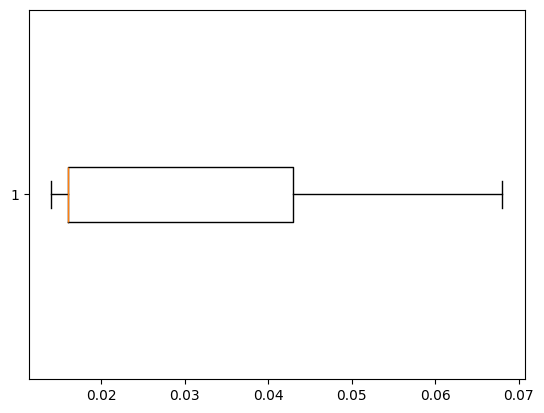

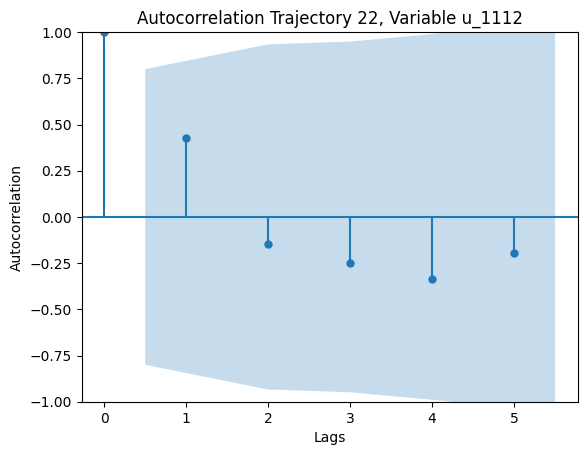

Standard deviation of Trajectory22, u_1111: 0.04207389948354537
Mean of Trajectory 22, u_1111: 0.06069230769230769


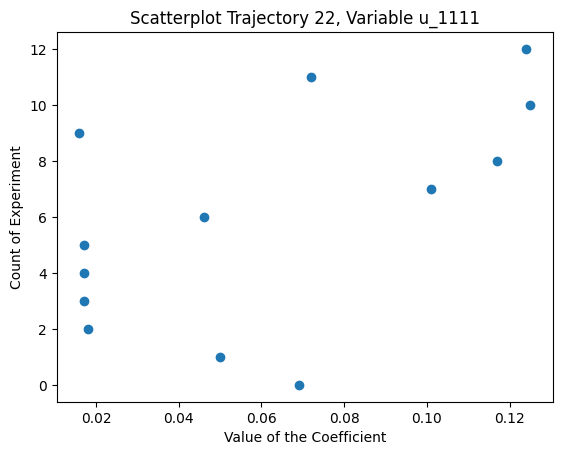

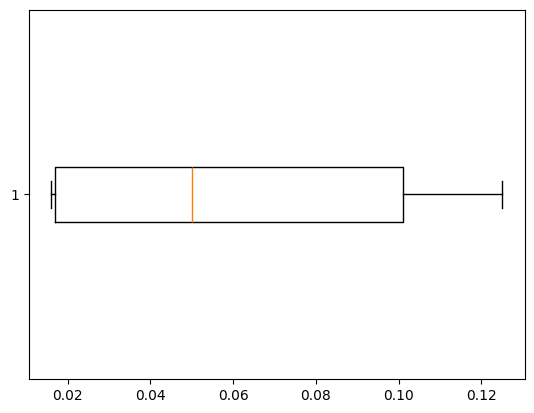

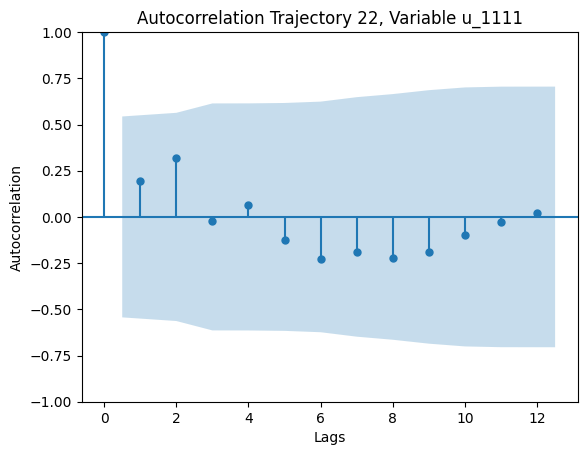

Standard deviation of Trajectory24, u: 0.10174502241769304
Mean of Trajectory 24, u: 0.14163636363636364


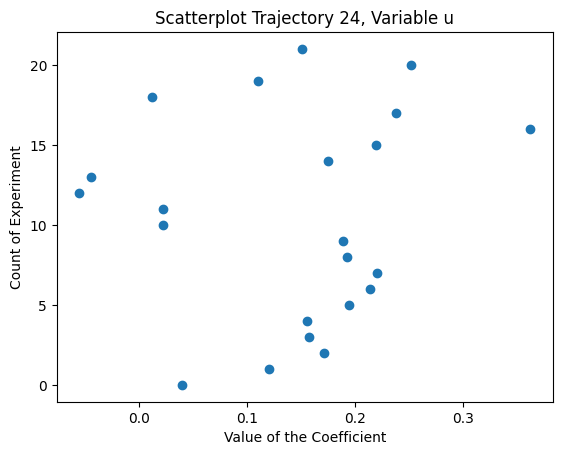

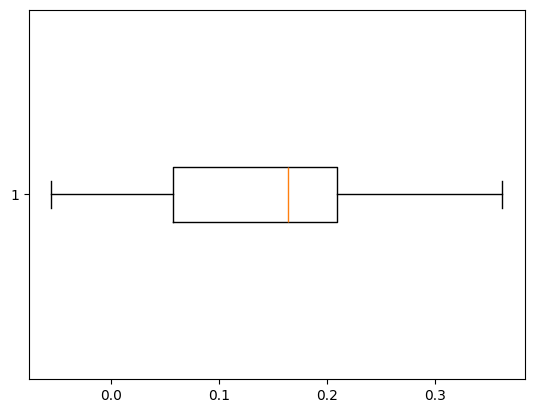

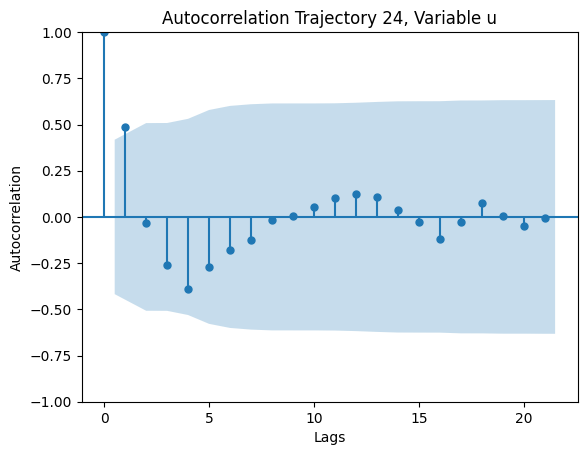

Standard deviation of Trajectory24, uu: 0.11952619962457693
Mean of Trajectory 24, uu: 0.15681818181818183


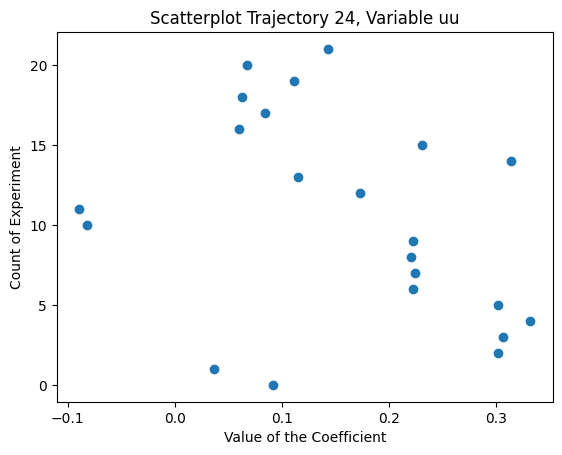

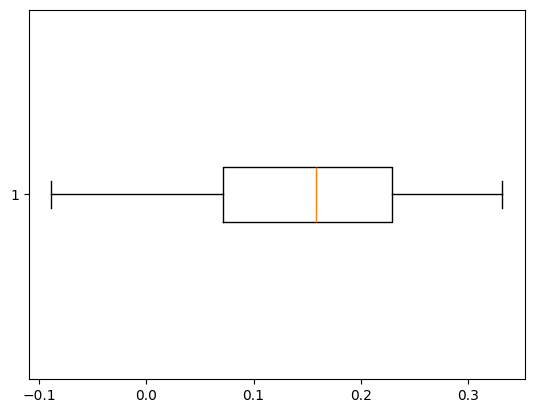

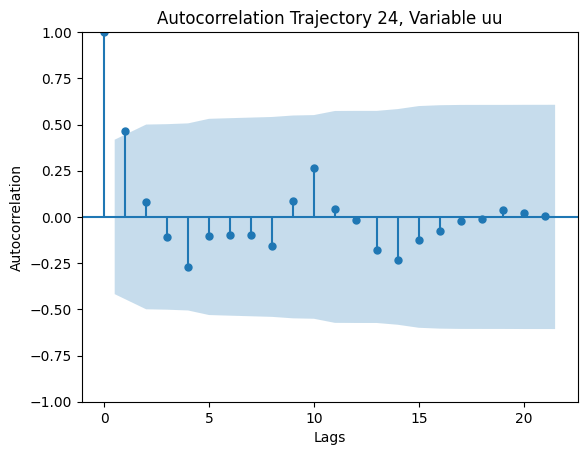

Standard deviation of Trajectory24, u_22: 0.026057150060052187
Mean of Trajectory 24, u_22: 0.06615789473684211


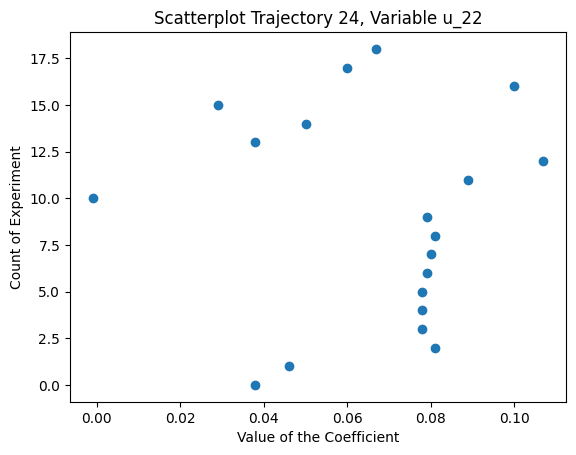

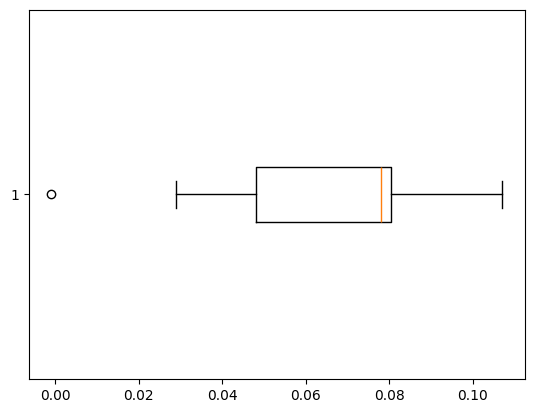

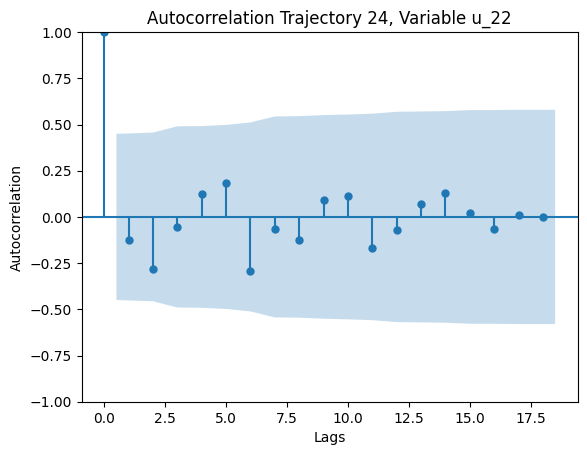

Standard deviation of Trajectory24, u_222: 0.022396359944765805
Mean of Trajectory 24, u_222: 0.038214285714285715


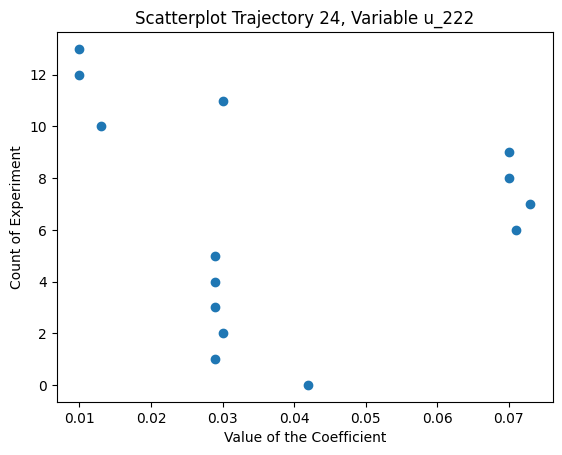

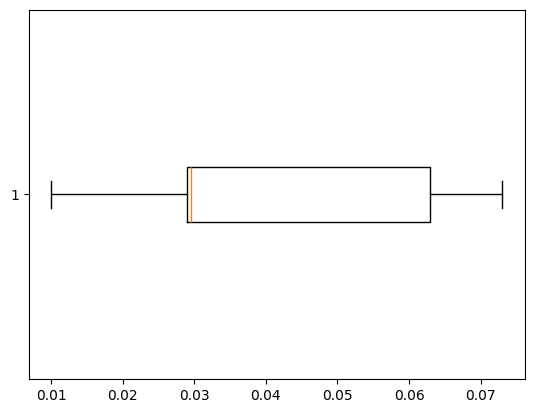

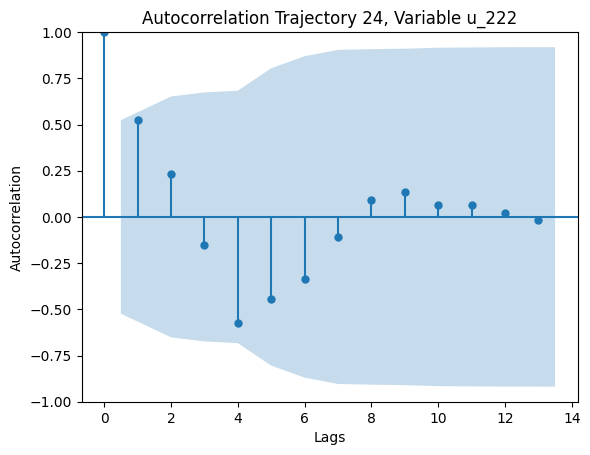

Standard deviation of Trajectory24, u_2222: 0.02669610643456143
Mean of Trajectory 24, u_2222: 0.07238888888888889


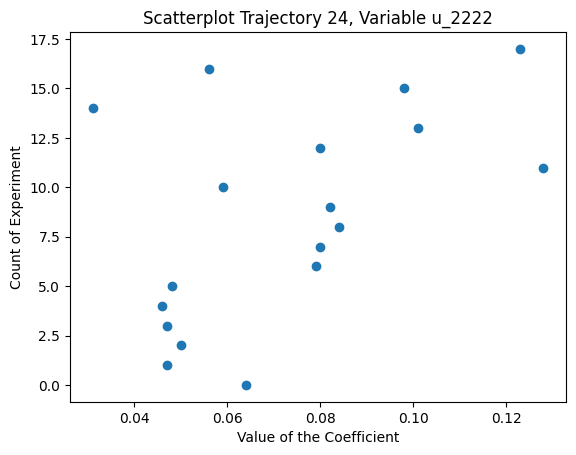

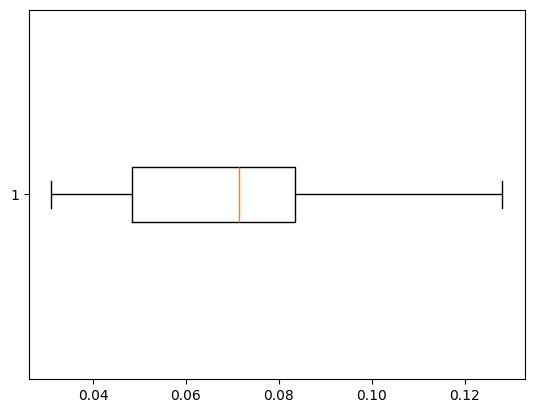

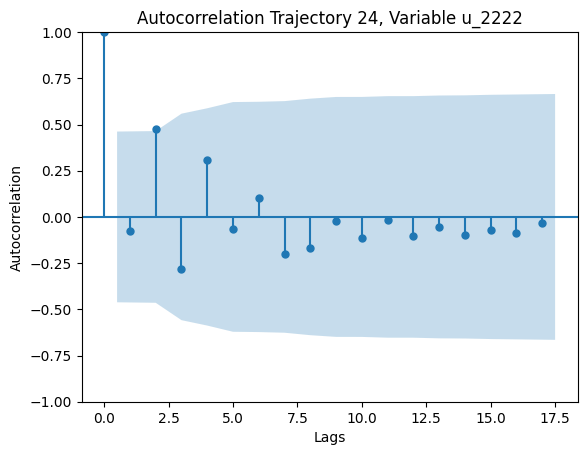

Standard deviation of Trajectory24, u_1: 0.13183944781437765
Mean of Trajectory 24, u_1: 0.0013999999999999987


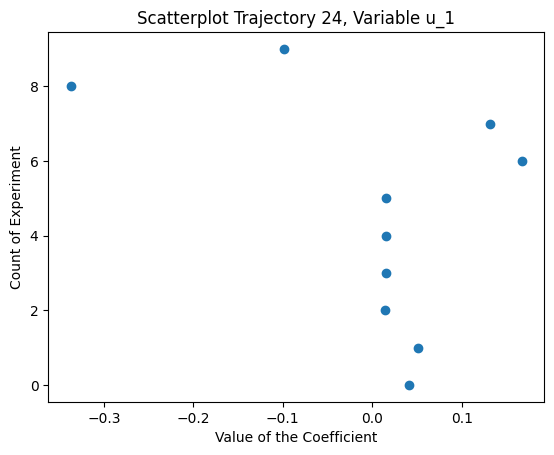

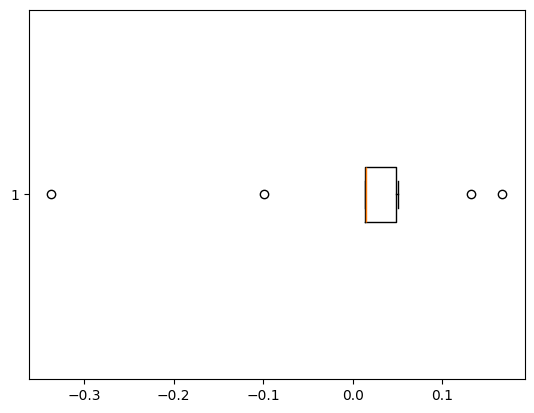

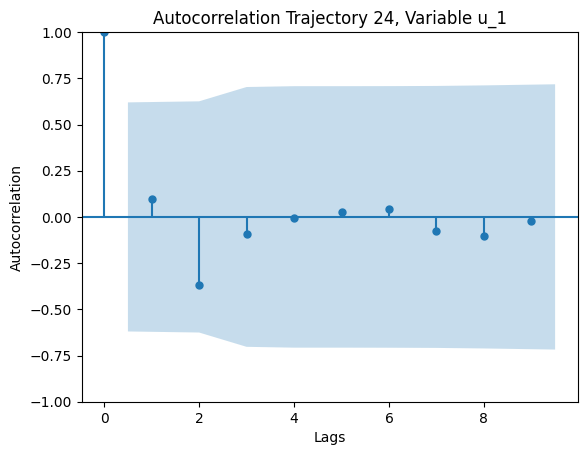

Standard deviation of Trajectory24, u_12: 0.018060661671157014
Mean of Trajectory 24, u_12: 0.02775


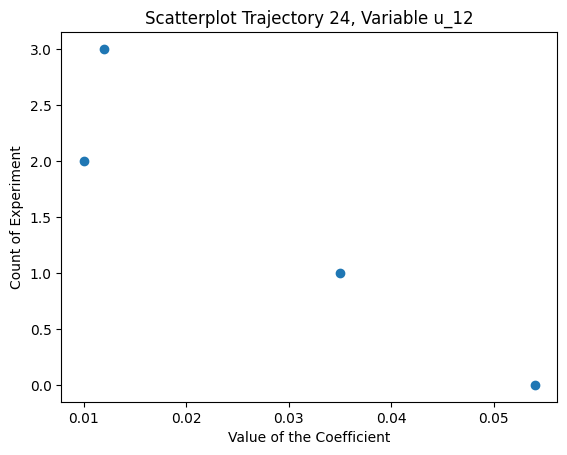

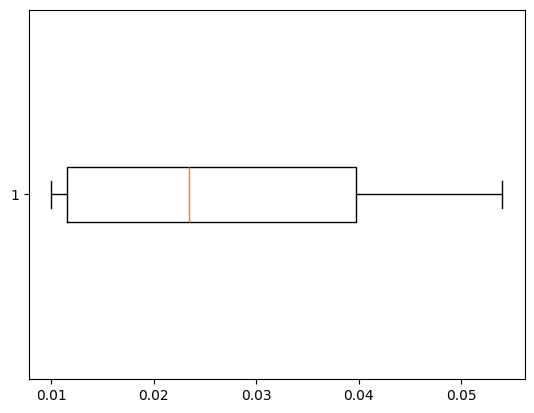

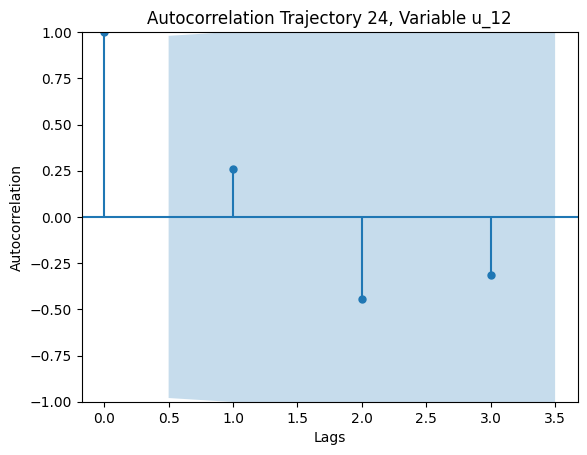

Standard deviation of Trajectory24, u_122: 0.018635556085539382
Mean of Trajectory 24, u_122: 0.011222222222222222


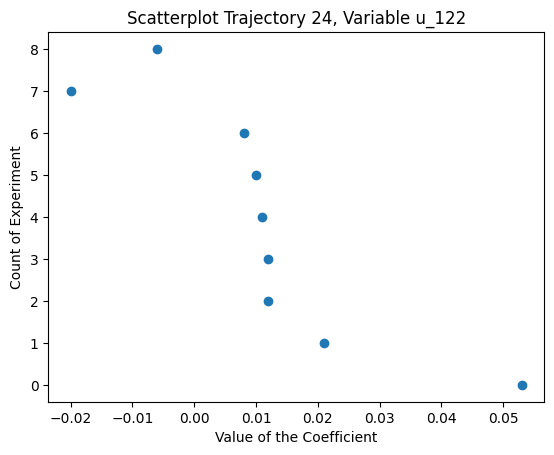

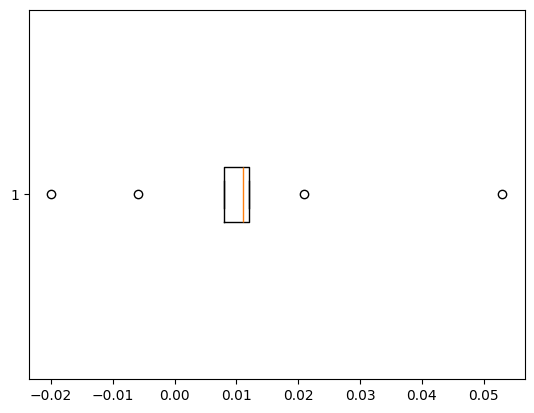

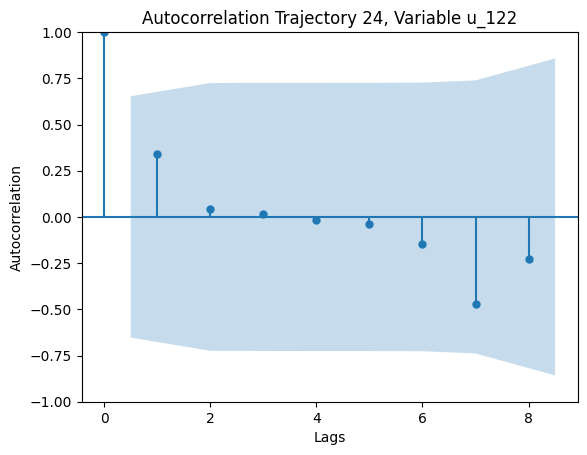

Standard deviation of Trajectory24, u_1222: 0.024458581770458853
Mean of Trajectory 24, u_1222: 0.03133333333333333


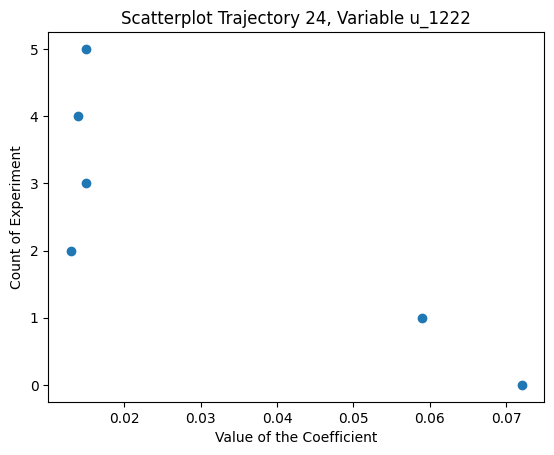

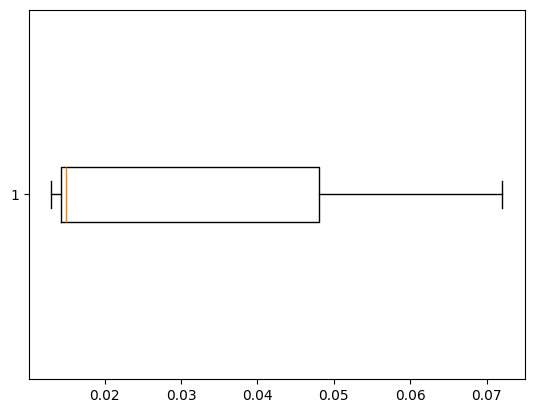

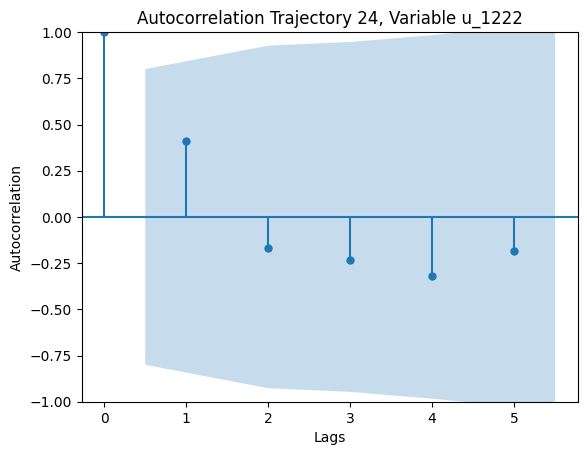

Standard deviation of Trajectory24, u_11: 0.03156039596947415
Mean of Trajectory 24, u_11: 0.0559375


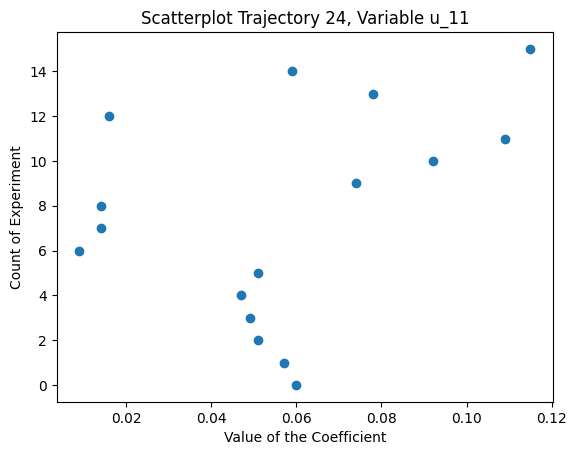

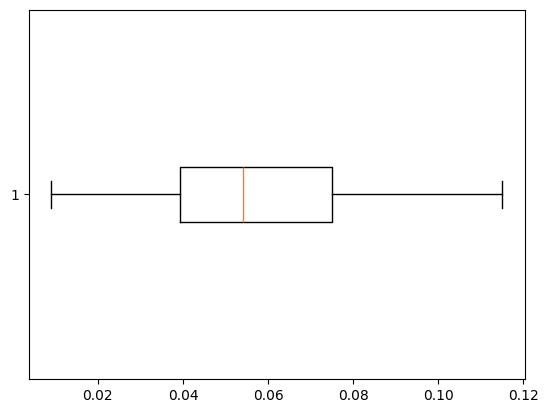

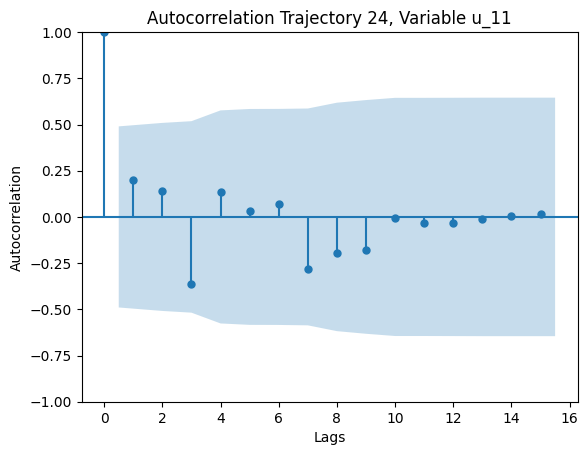

Standard deviation of Trajectory24, u_112: 0.018059900331950894
Mean of Trajectory 24, u_112: 0.0208


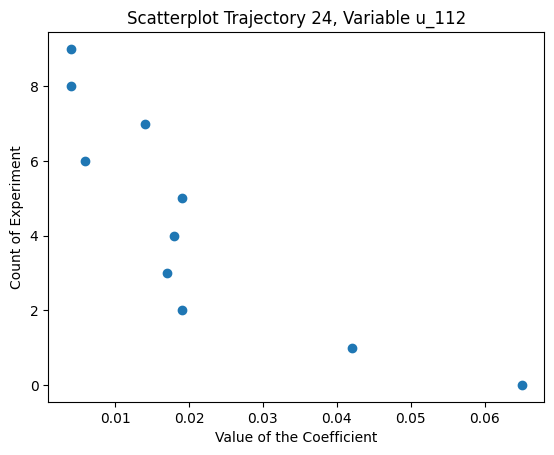

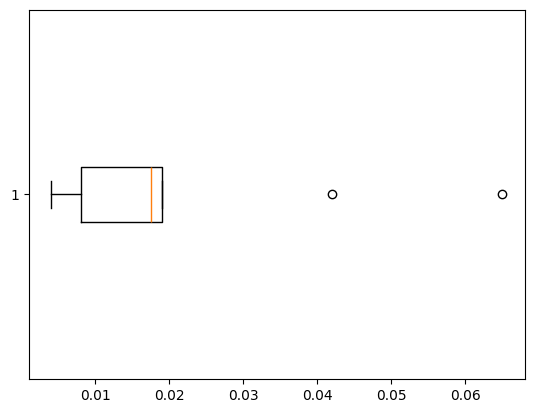

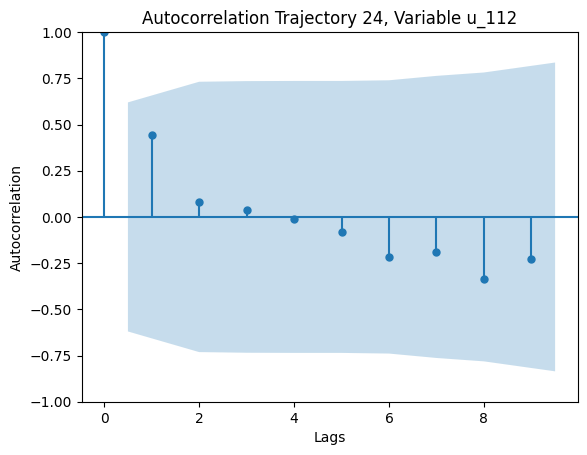

Standard deviation of Trajectory24, u_1122: 0.03675761756397702
Mean of Trajectory 24, u_1122: 0.04585714285714286


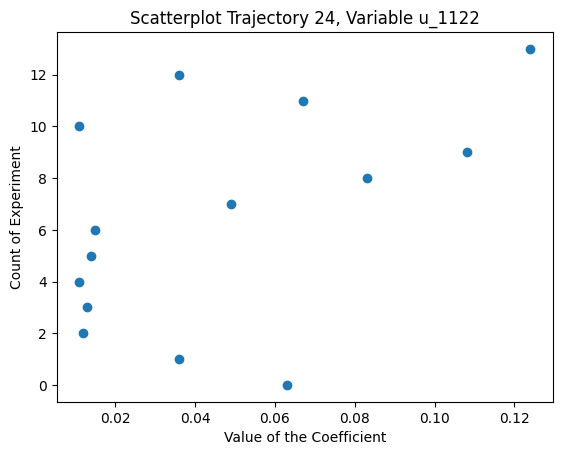

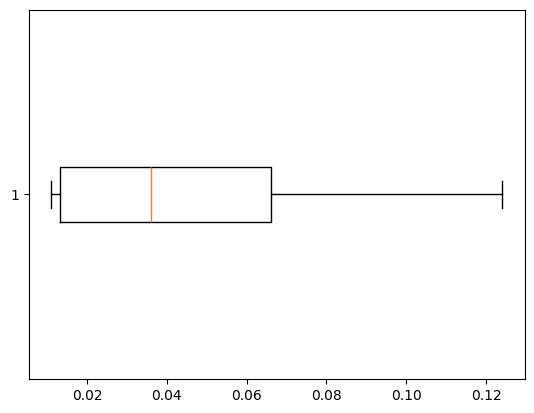

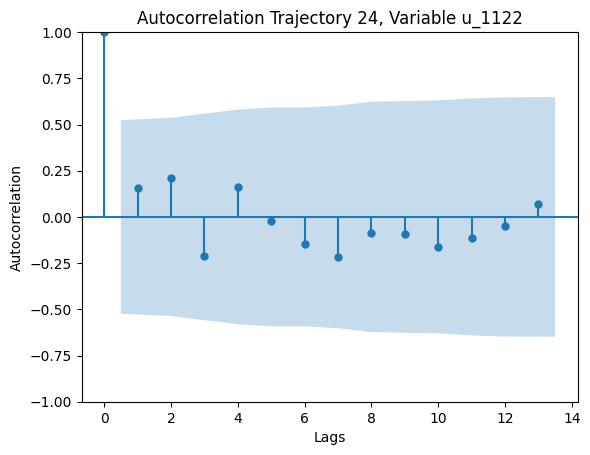

Standard deviation of Trajectory24, u_111: 0.03134086788842964
Mean of Trajectory 24, u_111: 0.017499999999999998


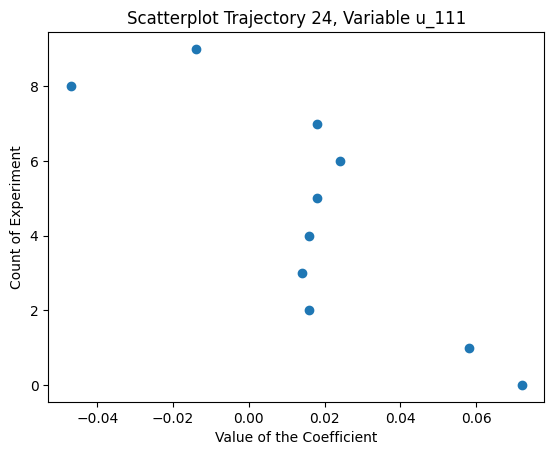

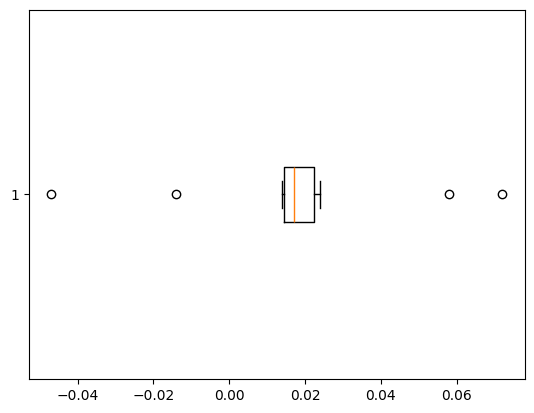

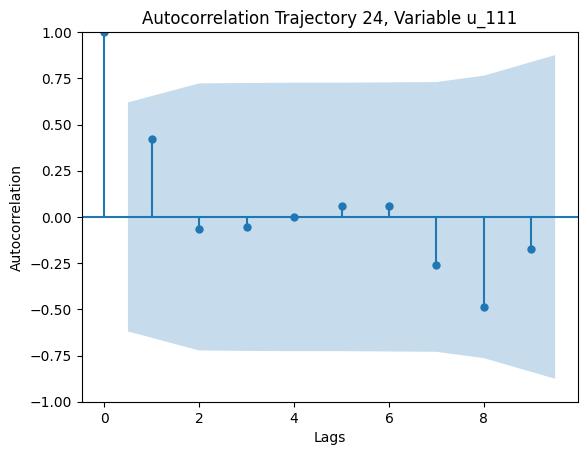

Standard deviation of Trajectory24, u_1112: 0.024143667216615344
Mean of Trajectory 24, u_1112: 0.0295


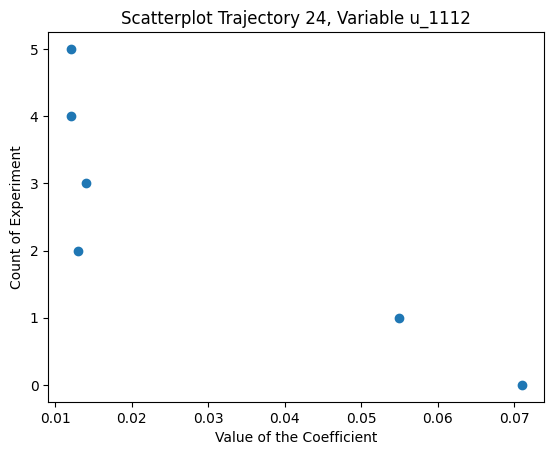

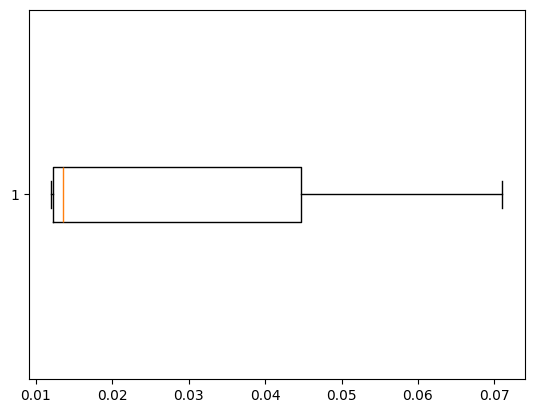

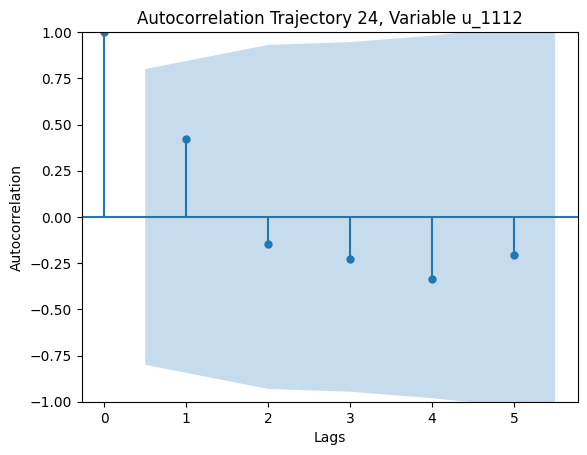

Standard deviation of Trajectory24, u_1111: 0.04012812812313411
Mean of Trajectory 24, u_1111: 0.05


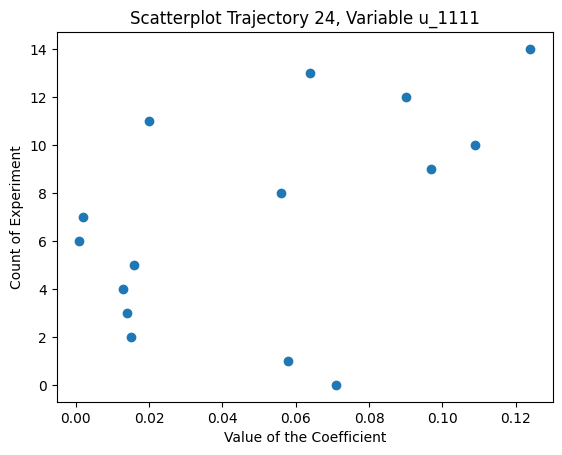

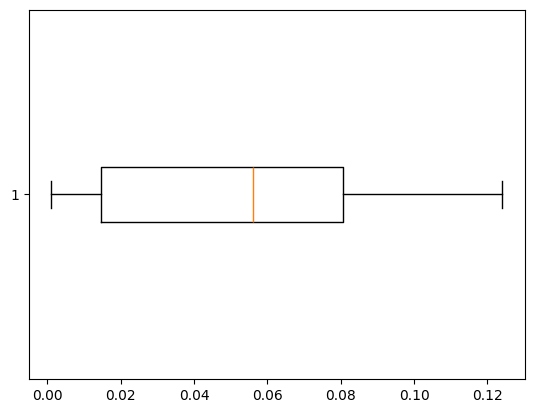

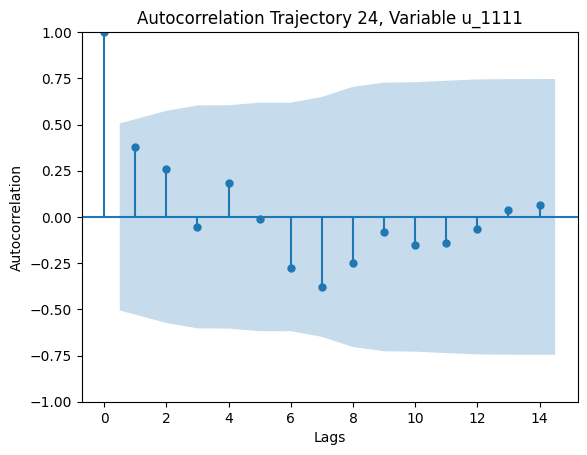

Standard deviation of Trajectory24, uuu: 0.0615909260920044
Mean of Trajectory 24, uuu: 0.05171428571428571


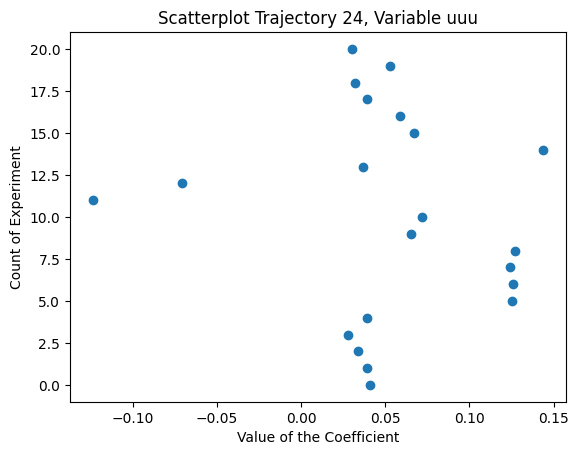

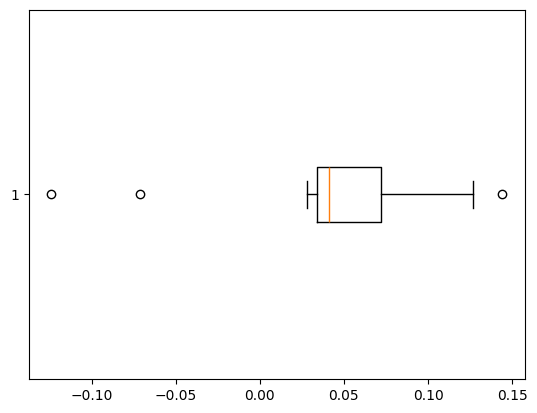

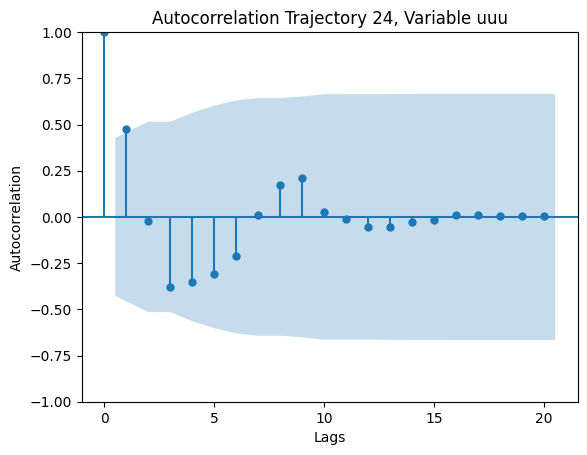

Standard deviation of Trajectory24, u_2: 0.05089332154138491
Mean of Trajectory 24, u_2: 0.06484615384615385


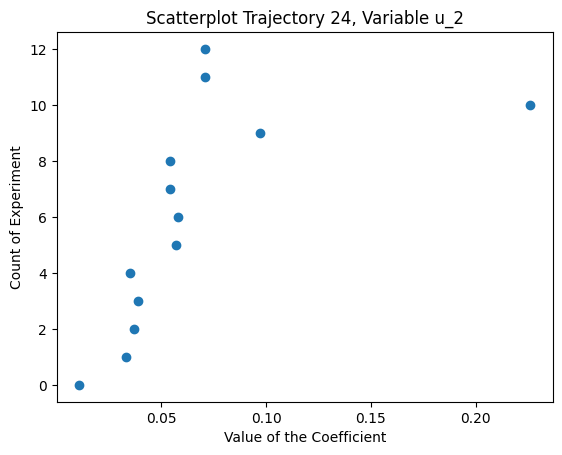

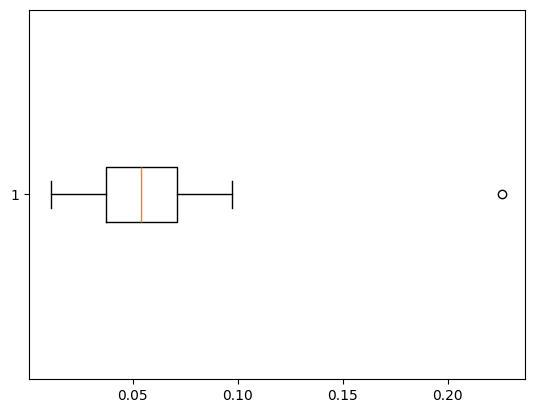

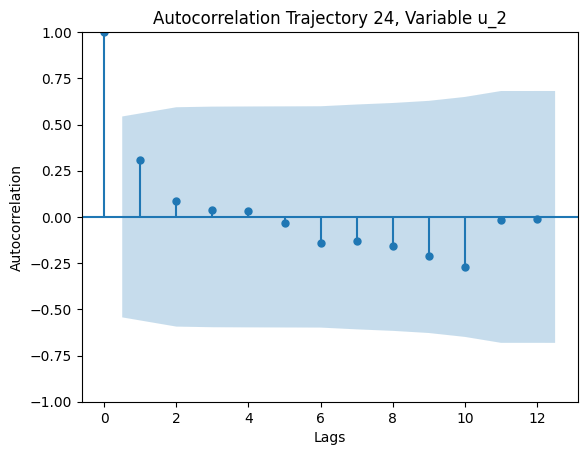

In [105]:
for trajectory in pde_dict:
    for variable in pde_dict[trajectory]:

        x = pde_dict[trajectory][variable]

        std = statistics.pstdev(x)
        mean = statistics.mean(x)
        print("Standard deviation of Trajectory" + trajectory + ", " + variable + ": " + str(std))
        print("Mean of Trajectory " + trajectory + ", " + variable + ": " + str(mean))

        y = np.arange(0, len(x), 1)
        plt.title("Scatterplot Trajectory " + trajectory + ", Variable " + variable)
        plt.xlabel("Value of the Coefficient")
        plt.ylabel("Count of Experiment")
        plt.scatter(x, y)
        plt.show()

        plt.boxplot(x, vert=False)
        plt.show()
        
        sm.tsa.acf(x)
        fig = tsaplots.plot_acf(x, lags=(len(x)-1))
        plt.title("Autocorrelation Trajectory " + trajectory + ", Variable " + variable)
        plt.xlabel("Lags")
        plt.ylabel("Autocorrelation")
        plt.show()